## Introdução

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [2264]:
!pip3 install category_encoders

In [2265]:
'''import libraries'''
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import category_encoders as ce

In [2266]:
'''Load CSVs'''
energia_2021 = pd.read_csv('./competition/energia_202109-202112.csv')
energia_2022 = pd.read_csv('./competition/energia_202201-202212.csv')
meteo_2021 = pd.read_csv('./competition/meteo_202109-202112.csv')
meteo_2022 = pd.read_csv('./competition/meteo_202201-202212.csv')

teste_energia = pd.read_csv('./competition/energia_202301-202304.csv')
teste_meteo = pd.read_csv('./competition/meteo_202301-202304.csv')

## Análise dos Dados

### Dataset Energia

In [2267]:
energia_2021.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,NaN
1,2021-09-29,1,0.0,0.0,0.0,NaN
2,2021-09-29,2,0.0,0.0,0.0,NaN
3,2021-09-29,3,0.0,0.0,0.0,NaN
4,2021-09-29,4,0.0,0.0,0.0,NaN


In [2268]:
energia_2022.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2022-01-01,0,0.0,0.486,0.0,NaN
1,2022-01-01,1,0.0,0.429,0.0,NaN
2,2022-01-01,2,0.0,0.463,0.0,NaN
3,2022-01-01,3,0.0,0.545,0.0,NaN
4,2022-01-01,4,0.0,0.439,0.0,NaN


In [2269]:
energia_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injeção na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB


In [2270]:
energia_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null   float64
 3   Horário Económico (kWh)  8760 non-null   float64
 4   Autoconsumo (kWh)        8760 non-null   float64
 5   Injeção na rede (kWh)    2673 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 410.8+ KB


#### Full Join dos datasets Energia 2021 e Energia 2022

In [2271]:
energia_21 = energia_2021.copy()
energia_22 = energia_2022.copy() 
energia = pd.merge(energia_21, energia_22, how="outer", on=['Data', 'Hora','Normal (kWh)','Horário Económico (kWh)','Autoconsumo (kWh)','Injeção na rede (kWh)'])
energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 516.5+ KB


### Dataset Meteorologia 

In [2272]:
meteo_2021.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [2273]:
meteo_2022.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1640995200,2022-01-01 00:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.15,NaN,97,overcast clouds
1,1640998800,2022-01-01 01:00:00 +0000 UTC,local,16.59,16.00,16.21,16.72,1024,NaN,NaN,65,3.14,NaN,58,broken clouds
2,1641002400,2022-01-01 02:00:00 +0000 UTC,local,16.59,16.03,15.67,16.72,1024,NaN,NaN,66,3.12,NaN,23,few clouds
3,1641006000,2022-01-01 03:00:00 +0000 UTC,local,13.59,12.75,11.61,16.16,1023,NaN,NaN,67,3.08,NaN,22,few clouds
4,1641009600,2022-01-01 04:00:00 +0000 UTC,local,14.97,14.27,14.72,15.66,1023,NaN,NaN,67,3.12,NaN,15,few clouds


In [2274]:
meteo_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             2928 non-null   int64  
 11  wind_speed           2928 non-null   float64
 12  rain_1h              537 non-null    float64
 13  clouds_all           2928 non-null   int64  
 14  weather_description  2928 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

In [2275]:
meteo_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   8760 non-null   int64  
 1   dt_iso               8760 non-null   object 
 2   city_name            8760 non-null   object 
 3   temp                 8760 non-null   float64
 4   feels_like           8760 non-null   float64
 5   temp_min             8760 non-null   float64
 6   temp_max             8760 non-null   float64
 7   pressure             8760 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             8760 non-null   int64  
 11  wind_speed           8760 non-null   float64
 12  rain_1h              1898 non-null   float64
 13  clouds_all           8760 non-null   int64  
 14  weather_description  8760 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

#### Full Join dos datasets Meteorologia 2021 e Meteorologia 2022

In [2276]:
meteo_21 = meteo_2021.copy()
meteo_22 = meteo_2022.copy() 
meteo = pd.merge(meteo_21, meteo_22, how="outer", on=['dt','dt_iso','city_name','temp', 'feels_like', 'temp_min', 'temp_max' , 'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'])
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   11688 non-null  int64  
 1   dt_iso               11688 non-null  object 
 2   city_name            11688 non-null  object 
 3   temp                 11688 non-null  float64
 4   feels_like           11688 non-null  float64
 5   temp_min             11688 non-null  float64
 6   temp_max             11688 non-null  float64
 7   pressure             11688 non-null  int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             11688 non-null  int64  
 11  wind_speed           11688 non-null  float64
 12  rain_1h              2435 non-null   float64
 13  clouds_all           11688 non-null  int64  
 14  weather_description  11688 non-null  object 
dtypes: float64(8), int64(4), object(3)
m

### Inner Join dos datasets Energia e Meteorologia

#### Criação de uma coluna Timestamp no Dataset Energia 

Junção das colunas 'Data' e 'Hora' para criar a coluna 'Data_Hora'

In [2277]:
energia['Data_Hora'] = energia['Data'] + ":" + energia['Hora'].astype(str)
energia.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Data_Hora
0,2021-09-29,0,0.0,0.0,0.0,NaN,2021-09-29:0
1,2021-09-29,1,0.0,0.0,0.0,NaN,2021-09-29:1
2,2021-09-29,2,0.0,0.0,0.0,NaN,2021-09-29:2
3,2021-09-29,3,0.0,0.0,0.0,NaN,2021-09-29:3
4,2021-09-29,4,0.0,0.0,0.0,NaN,2021-09-29:4


Criação da coluna 'dt' com timetamps a partir da coluna 'Data_Hora'

In [2278]:
energia['dt'] = energia['Data_Hora'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d:%H').timestamp()).astype('int64')
energia.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Data_Hora,dt
0,2021-09-29,0,0.0,0.0,0.0,NaN,2021-09-29:0,1632873600
1,2021-09-29,1,0.0,0.0,0.0,NaN,2021-09-29:1,1632877200
2,2021-09-29,2,0.0,0.0,0.0,NaN,2021-09-29:2,1632880800
3,2021-09-29,3,0.0,0.0,0.0,NaN,2021-09-29:3,1632884400
4,2021-09-29,4,0.0,0.0,0.0,NaN,2021-09-29:4,1632888000


Provar que ambas as colunas são iguais

In [2279]:
energia_1 = energia.copy()

In [2280]:
# Converter para datetime a coluna dt
energia_1['dt'] = pd.to_datetime(energia_1['dt'], unit='s', utc=True)
energia_1.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Data_Hora,dt
0,2021-09-29,0,0.0,0.0,0.0,NaN,2021-09-29:0,2021-09-29 00:00:00+00:00
1,2021-09-29,1,0.0,0.0,0.0,NaN,2021-09-29:1,2021-09-29 01:00:00+00:00
2,2021-09-29,2,0.0,0.0,0.0,NaN,2021-09-29:2,2021-09-29 02:00:00+00:00
3,2021-09-29,3,0.0,0.0,0.0,NaN,2021-09-29:3,2021-09-29 03:00:00+00:00
4,2021-09-29,4,0.0,0.0,0.0,NaN,2021-09-29:4,2021-09-29 04:00:00+00:00


In [2281]:
# Criação de duas colunas, Data2 e Hora2, a partir da coluna dt
energia_1["Data2"] = energia_1["dt"].dt.date.astype("datetime64[ns]")
assert energia_1['Data2'].isnull().sum() == 0, 'missing Data'

energia_1["Hora2"] = energia_1["dt"].dt.hour.astype('int64')
assert energia_1['Hora2'].isnull().sum() == 0, 'missing Data'    # acho que isto só faz senti com o errors='coerce'

# Converte a coluna Data para o tipo datetime para futura comparação com a coluna Data2
energia_1["Data"] = energia_1["Data"].astype("datetime64[ns]")

In [2282]:
# Verificar se as colunas são exatamente iguais
print(energia_1['Data2'].equals(energia_1['Data']))
print(energia_1['Hora2'].equals(energia_1['Hora']))

True
True


Junção dos dataset Energia e Meteorologia utilizando a coluna 'dt'

In [2283]:
e_m = pd.merge(meteo, energia, how="inner", on= 'dt')

Conversão da coluna 'dt' de segundos para horas de forma a diminuir o intervalo de valores comparativamente às restantes features

In [2284]:
def seconds_to_hours(x):
    return x / 3600

In [2285]:
#e_m['dt'] = e_m['dt'].apply(lambda x: seconds_to_hours(x))
#e_m.describe()

### Análise dos Dados do novo dataset

In [2286]:
e_m.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,...,rain_1h,clouds_all,weather_description,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Data_Hora
0,1632873600,2021-09-29 00:00:00 +0000 UTC,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,...,NaN,87,overcast clouds,2021-09-29,0,0.0,0.0,0.0,NaN,2021-09-29:0
1,1632877200,2021-09-29 01:00:00 +0000 UTC,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,...,NaN,91,overcast clouds,2021-09-29,1,0.0,0.0,0.0,NaN,2021-09-29:1
2,1632880800,2021-09-29 02:00:00 +0000 UTC,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,...,NaN,93,overcast clouds,2021-09-29,2,0.0,0.0,0.0,NaN,2021-09-29:2
3,1632884400,2021-09-29 03:00:00 +0000 UTC,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,...,NaN,95,overcast clouds,2021-09-29,3,0.0,0.0,0.0,NaN,2021-09-29:3
4,1632888000,2021-09-29 04:00:00 +0000 UTC,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,...,NaN,93,overcast clouds,2021-09-29,4,0.0,0.0,0.0,NaN,2021-09-29:4


In [2287]:
e_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dt                       11016 non-null  int64  
 1   dt_iso                   11016 non-null  object 
 2   city_name                11016 non-null  object 
 3   temp                     11016 non-null  float64
 4   feels_like               11016 non-null  float64
 5   temp_min                 11016 non-null  float64
 6   temp_max                 11016 non-null  float64
 7   pressure                 11016 non-null  int64  
 8   sea_level                0 non-null      float64
 9   grnd_level               0 non-null      float64
 10  humidity                 11016 non-null  int64  
 11  wind_speed               11016 non-null  float64
 12  rain_1h                  2284 non-null   float64
 13  clouds_all               11016 non-null  int64  
 14  weather_description   

In [2288]:
'''
Verificar a quantidade de Missing Values no dataset
'''
print(e_m.isnull().sum()) 

dt                             0
dt_iso                         0
city_name                      0
temp                           0
feels_like                     0
temp_min                       0
temp_max                       0
pressure                       0
sea_level                  11016
grnd_level                 11016
humidity                       0
wind_speed                     0
rain_1h                     8732
clouds_all                     0
weather_description            0
Data                           0
Hora                           0
Normal (kWh)                   0
Horário Económico (kWh)        0
Autoconsumo (kWh)              0
Injeção na rede (kWh)       7777
Data_Hora                      0
dtype: int64


<Axes: >

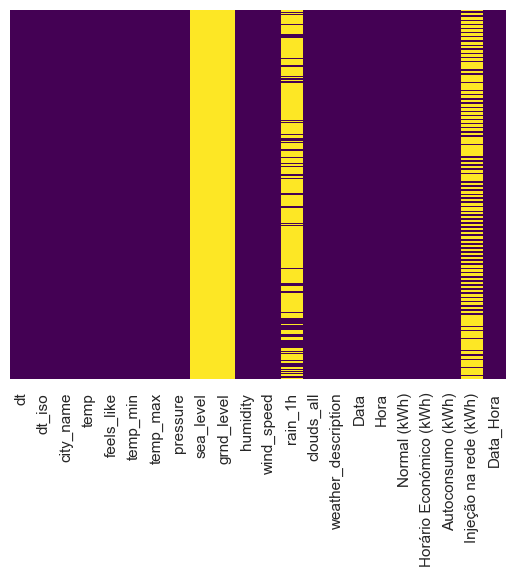

In [2289]:
sns.heatmap(e_m.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [2290]:
'''
Verificar a quantidade de valores únicos em cada feature
'''
e_m.nunique()

dt                         11016
dt_iso                     11016
city_name                      1
temp                        2382
feels_like                  2670
temp_min                     481
temp_max                     545
pressure                      41
sea_level                      0
grnd_level                     0
humidity                      82
wind_speed                   771
rain_1h                      367
clouds_all                   101
weather_description            8
Data                         459
Hora                          24
Normal (kWh)                1282
Horário Económico (kWh)      851
Autoconsumo (kWh)            752
Injeção na rede (kWh)          4
Data_Hora                  11016
dtype: int64

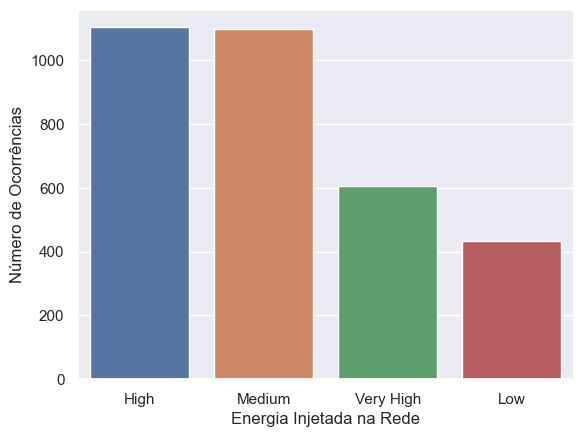

In [2291]:
'''
Analisar a feature "Injeção na Rede"
'''

e_m_count = e_m["Injeção na rede (kWh)"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=e_m_count.index, y=e_m_count.values)
plt.title('')
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xlabel('Energia Injetada na Rede', fontsize=12)
plt.show()

In [2292]:
e_m.describe()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh)
count,1.101600e+04,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,0.0,0.0,11016.000000,11016.000000,2284.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,1.652701e+09,16.182991,15.826868,14.195064,17.288098,1018.396605,NaN,NaN,76.570715,2.672039,0.896642,54.000908,11.500000,0.202278,0.159714,0.117314
std,1.144868e+07,5.756972,6.264860,4.956014,6.164689,6.203379,NaN,NaN,16.268260,1.476158,1.079381,40.553002,6.922501,0.349478,0.271792,0.176762
min,1.632874e+09,0.320000,-2.190000,-0.640000,1.330000,994.000000,NaN,NaN,19.000000,0.060000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.642787e+09,12.080000,11.507500,10.720000,12.890000,1015.000000,NaN,NaN,66.000000,1.620000,0.210000,7.000000,5.750000,0.000000,0.000000,0.000000
50%,1.652701e+09,15.625000,15.230000,14.230000,16.260000,1018.000000,NaN,NaN,81.000000,2.400000,0.460000,60.000000,11.500000,0.000000,0.000000,0.000000
75%,1.662614e+09,19.270000,19.260000,17.490000,20.340000,1022.000000,NaN,NaN,91.000000,3.420000,1.092500,98.000000,17.250000,0.314000,0.288000,0.227000
max,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,NaN,NaN,100.000000,11.100000,7.450000,100.000000,23.000000,3.251000,6.978000,1.192000


### Datasets de teste

#### Energia

In [2293]:
teste_energia.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh)
0,2023-01-01,0,0.0,0.467,0.0
1,2023-01-01,1,0.0,0.577,0.0
2,2023-01-01,2,0.0,0.346,0.0
3,2023-01-01,3,0.0,0.270,0.0
4,2023-01-01,4,0.0,0.252,0.0


In [2294]:
teste_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 88.2+ KB


#### Meteorologia

In [2295]:
teste_meteo.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1672531200,2023-01-01 00:00:00 +0000 UTC,local,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,100,moderate rain
1,1672534800,2023-01-01 01:00:00 +0000 UTC,local,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,100,moderate rain
2,1672538400,2023-01-01 02:00:00 +0000 UTC,local,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,100,moderate rain
3,1672542000,2023-01-01 03:00:00 +0000 UTC,local,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,100,moderate rain
4,1672545600,2023-01-01 04:00:00 +0000 UTC,local,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,100,moderate rain


In [2296]:
teste_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   1752 non-null   int64  
 1   dt_iso               1752 non-null   object 
 2   city_name            1752 non-null   object 
 3   temp                 1752 non-null   float64
 4   feels_like           1752 non-null   float64
 5   temp_min             1752 non-null   float64
 6   temp_max             1752 non-null   float64
 7   pressure             1752 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             1752 non-null   int64  
 11  wind_speed           1752 non-null   float64
 12  rain_1h              206 non-null    float64
 13  clouds_all           1752 non-null   int64  
 14  weather_description  1752 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

#### Iuternner join dos datasetsO

In [2297]:
teste_energia['Data_Hora'] = teste_energia['Data'] + ":" + teste_energia['Hora'].astype(str)
teste_energia.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Data_Hora
0,2023-01-01,0,0.0,0.467,0.0,2023-01-01:0
1,2023-01-01,1,0.0,0.577,0.0,2023-01-01:1
2,2023-01-01,2,0.0,0.346,0.0,2023-01-01:2
3,2023-01-01,3,0.0,0.270,0.0,2023-01-01:3
4,2023-01-01,4,0.0,0.252,0.0,2023-01-01:4


In [2298]:
teste_energia['dt'] = teste_energia['Data_Hora'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d:%H').timestamp()).astype('int64')
teste_energia.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Data_Hora,dt
0,2023-01-01,0,0.0,0.467,0.0,2023-01-01:0,1672531200
1,2023-01-01,1,0.0,0.577,0.0,2023-01-01:1,1672534800
2,2023-01-01,2,0.0,0.346,0.0,2023-01-01:2,1672538400
3,2023-01-01,3,0.0,0.270,0.0,2023-01-01:3,1672542000
4,2023-01-01,4,0.0,0.252,0.0,2023-01-01:4,1672545600


In [2299]:
teste = pd.merge(teste_meteo, teste_energia, how="outer", on= 'dt')

#### Análise dos dados do dataset teste

In [2300]:
teste.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,...,wind_speed,rain_1h,clouds_all,weather_description,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Data_Hora
0,1672531200,2023-01-01 00:00:00 +0000 UTC,local,12.93,12.76,12.72,13.43,1019.0,NaN,NaN,...,2.02,3.72,100.0,moderate rain,2023-01-01,0,0.0,0.467,0.0,2023-01-01:0
1,1672534800,2023-01-01 01:00:00 +0000 UTC,local,13.49,13.38,13.43,13.90,1018.0,NaN,NaN,...,2.18,3.26,100.0,moderate rain,2023-01-01,1,0.0,0.577,0.0,2023-01-01:1
2,1672538400,2023-01-01 02:00:00 +0000 UTC,local,13.55,13.44,13.48,14.82,1017.0,NaN,NaN,...,2.88,2.44,100.0,moderate rain,2023-01-01,2,0.0,0.346,0.0,2023-01-01:2
3,1672542000,2023-01-01 03:00:00 +0000 UTC,local,13.61,13.51,12.01,14.82,1016.0,NaN,NaN,...,3.63,1.74,100.0,moderate rain,2023-01-01,3,0.0,0.270,0.0,2023-01-01:3
4,1672545600,2023-01-01 04:00:00 +0000 UTC,local,13.59,13.49,12.01,14.82,1015.0,NaN,NaN,...,4.58,1.13,100.0,moderate rain,2023-01-01,4,0.0,0.252,0.0,2023-01-01:4


In [2301]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dt                       2256 non-null   int64  
 1   dt_iso                   1752 non-null   object 
 2   city_name                1752 non-null   object 
 3   temp                     1752 non-null   float64
 4   feels_like               1752 non-null   float64
 5   temp_min                 1752 non-null   float64
 6   temp_max                 1752 non-null   float64
 7   pressure                 1752 non-null   float64
 8   sea_level                0 non-null      float64
 9   grnd_level               0 non-null      float64
 10  humidity                 1752 non-null   float64
 11  wind_speed               1752 non-null   float64
 12  rain_1h                  206 non-null    float64
 13  clouds_all               1752 non-null   float64
 14  weather_description     

In [2302]:
print(teste.isnull().sum()) 

dt                            0
dt_iso                      504
city_name                   504
temp                        504
feels_like                  504
temp_min                    504
temp_max                    504
pressure                    504
sea_level                  2256
grnd_level                 2256
humidity                    504
wind_speed                  504
rain_1h                    2050
clouds_all                  504
weather_description         504
Data                          0
Hora                          0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Data_Hora                     0
dtype: int64


<Axes: >

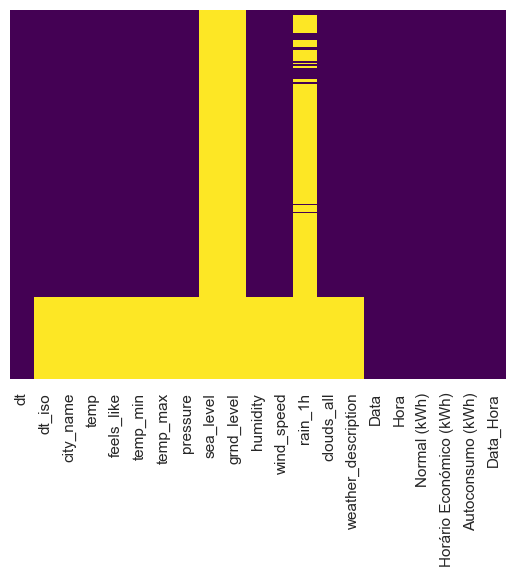

In [2303]:
sns.heatmap(teste.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [2304]:
teste.nunique()

dt                         2256
dt_iso                     1752
city_name                     1
temp                        889
feels_like                 1007
temp_min                    169
temp_max                    174
pressure                     31
sea_level                     0
grnd_level                    0
humidity                     71
wind_speed                  512
rain_1h                     120
clouds_all                   99
weather_description           8
Data                         94
Hora                         24
Normal (kWh)                709
Horário Económico (kWh)     490
Autoconsumo (kWh)           485
Data_Hora                  2256
dtype: int64

In [2305]:
teste.describe()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh)
count,2.256000e+03,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,0.0,0.0,1752.000000,1752.000000,206.000000,1752.000000,2256.000000,2256.000000,2256.000000,2256.000000
mean,1.676590e+09,10.599606,9.543265,9.177917,11.643813,1023.493721,NaN,NaN,75.639840,2.873613,1.025097,44.489726,11.500000,0.268060,0.226809,0.119439
std,2.345024e+06,3.715156,4.191224,4.021176,3.596882,6.650873,NaN,NaN,17.415468,1.620450,1.209617,42.972438,6.923721,0.464323,0.375752,0.190601
min,1.672531e+09,0.930000,-1.790000,-0.850000,3.340000,1006.000000,NaN,NaN,23.000000,0.120000,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.674561e+09,7.877500,6.217500,6.247500,8.900000,1020.000000,NaN,NaN,62.000000,1.800000,0.250000,0.000000,5.750000,0.000000,0.000000,0.000000
50%,1.676590e+09,10.950000,10.135000,9.710000,11.820000,1024.000000,NaN,NaN,81.000000,2.490000,0.565000,35.000000,11.500000,0.000000,0.000000,0.000000
75%,1.678620e+09,13.292500,12.742500,12.320000,14.040000,1029.000000,NaN,NaN,91.000000,3.500000,1.245000,96.000000,17.250000,0.398750,0.336000,0.237250
max,1.680649e+09,20.610000,19.790000,20.010000,22.010000,1036.000000,NaN,NaN,97.000000,10.320000,6.380000,100.000000,23.000000,3.381000,2.771000,1.161000


## Tratamento dos Dados

### Simplificação dos nomes das features

In [2306]:
e_m.rename(columns={"dt": "Timestamp"}, inplace=True)
e_m.rename(columns={"temp": "Temperatura"}, inplace=True)
e_m.rename(columns={"feels_like": "Sensação Térmica"}, inplace=True)
e_m.rename(columns={"temp_min": "Temperatura Mínima"}, inplace=True)
e_m.rename(columns={"temp_max": "Temperatura Máxima"}, inplace=True)
e_m.rename(columns={"pressure": "Pressão Atmosférica"}, inplace=True)
e_m.rename(columns={"humidity": "Humidade"}, inplace=True)
e_m.rename(columns={"wind_speed": "Velocidade Vento"}, inplace=True)
e_m.rename(columns={"rain_1h": "Precipitação Média"}, inplace=True)
e_m.rename(columns={"clouds_all": "Nebulosidade"}, inplace=True)
e_m.rename(columns={"weather_description": "Estado do Tempo"}, inplace=True)
e_m.rename(columns={"Normal (kWh)": "Normal"}, inplace=True)
e_m.rename(columns={"Horário Económico (kWh)": "Horário Económico"}, inplace=True)
e_m.rename(columns={"Autoconsumo (kWh)": "Autoconsumo"}, inplace=True)
e_m.rename(columns={"Injeção na rede (kWh)": "Injeção na Rede"}, inplace=True)

e_m.head()

,Timestamp,dt_iso,city_name,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,sea_level,grnd_level,...,Precipitação Média,Nebulosidade,Estado do Tempo,Data,Hora,Normal,Horário Económico,Autoconsumo,Injeção na Rede,Data_Hora
0,1632873600,2021-09-29 00:00:00 +0000 UTC,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,...,NaN,87,overcast clouds,2021-09-29,0,0.0,0.0,0.0,NaN,2021-09-29:0
1,1632877200,2021-09-29 01:00:00 +0000 UTC,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,...,NaN,91,overcast clouds,2021-09-29,1,0.0,0.0,0.0,NaN,2021-09-29:1
2,1632880800,2021-09-29 02:00:00 +0000 UTC,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,...,NaN,93,overcast clouds,2021-09-29,2,0.0,0.0,0.0,NaN,2021-09-29:2
3,1632884400,2021-09-29 03:00:00 +0000 UTC,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,...,NaN,95,overcast clouds,2021-09-29,3,0.0,0.0,0.0,NaN,2021-09-29:3
4,1632888000,2021-09-29 04:00:00 +0000 UTC,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,...,NaN,93,overcast clouds,2021-09-29,4,0.0,0.0,0.0,NaN,2021-09-29:4


In [2307]:
teste.rename(columns={"dt": "Timestamp"}, inplace=True)
teste.rename(columns={"temp": "Temperatura"}, inplace=True)
teste.rename(columns={"feels_like": "Sensação Térmica"}, inplace=True)
teste.rename(columns={"temp_min": "Temperatura Mínima"}, inplace=True)
teste.rename(columns={"temp_max": "Temperatura Máxima"}, inplace=True)
teste.rename(columns={"pressure": "Pressão Atmosférica"}, inplace=True)
teste.rename(columns={"humidity": "Humidade"}, inplace=True)
teste.rename(columns={"wind_speed": "Velocidade Vento"}, inplace=True)
teste.rename(columns={"rain_1h": "Precipitação Média"}, inplace=True)
teste.rename(columns={"clouds_all": "Nebulosidade"}, inplace=True)
teste.rename(columns={"weather_description": "Estado do Tempo"}, inplace=True)
teste.rename(columns={"Normal (kWh)": "Normal"}, inplace=True)
teste.rename(columns={"Horário Económico (kWh)": "Horário Económico"}, inplace=True)
teste.rename(columns={"Autoconsumo (kWh)": "Autoconsumo"}, inplace=True)
teste.rename(columns={"Injeção na rede (kWh)": "Injeção na Rede"}, inplace=True)

teste.head()

,Timestamp,dt_iso,city_name,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,sea_level,grnd_level,...,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Data,Hora,Normal,Horário Económico,Autoconsumo,Data_Hora
0,1672531200,2023-01-01 00:00:00 +0000 UTC,local,12.93,12.76,12.72,13.43,1019.0,NaN,NaN,...,2.02,3.72,100.0,moderate rain,2023-01-01,0,0.0,0.467,0.0,2023-01-01:0
1,1672534800,2023-01-01 01:00:00 +0000 UTC,local,13.49,13.38,13.43,13.90,1018.0,NaN,NaN,...,2.18,3.26,100.0,moderate rain,2023-01-01,1,0.0,0.577,0.0,2023-01-01:1
2,1672538400,2023-01-01 02:00:00 +0000 UTC,local,13.55,13.44,13.48,14.82,1017.0,NaN,NaN,...,2.88,2.44,100.0,moderate rain,2023-01-01,2,0.0,0.346,0.0,2023-01-01:2
3,1672542000,2023-01-01 03:00:00 +0000 UTC,local,13.61,13.51,12.01,14.82,1016.0,NaN,NaN,...,3.63,1.74,100.0,moderate rain,2023-01-01,3,0.0,0.270,0.0,2023-01-01:3
4,1672545600,2023-01-01 04:00:00 +0000 UTC,local,13.59,13.49,12.01,14.82,1015.0,NaN,NaN,...,4.58,1.13,100.0,moderate rain,2023-01-01,4,0.0,0.252,0.0,2023-01-01:4


### Remoção de features

Remoção de colunas com apenas 1 valor único ou com a totalidade dos seus registos representados por Missing Values

In [2308]:
e_m.drop(['city_name','sea_level','grnd_level'], axis=1, inplace=True)
e_m.columns

Index(['Timestamp', 'dt_iso', 'Temperatura', 'Sensação Térmica',
       'Temperatura Mínima', 'Temperatura Máxima', 'Pressão Atmosférica',
       'Humidade', 'Velocidade Vento', 'Precipitação Média', 'Nebulosidade',
       'Estado do Tempo', 'Data', 'Hora', 'Normal', 'Horário Económico',
       'Autoconsumo', 'Injeção na Rede', 'Data_Hora'],
      dtype='object')

In [2309]:
teste.drop(['city_name','sea_level','grnd_level'], axis=1, inplace=True)
teste.columns

Index(['Timestamp', 'dt_iso', 'Temperatura', 'Sensação Térmica',
       'Temperatura Mínima', 'Temperatura Máxima', 'Pressão Atmosférica',
       'Humidade', 'Velocidade Vento', 'Precipitação Média', 'Nebulosidade',
       'Estado do Tempo', 'Data', 'Hora', 'Normal', 'Horário Económico',
       'Autoconsumo', 'Data_Hora'],
      dtype='object')

Remoção da coluna 'Data_Hora', 'Data' e 'Hora' visto que agora são representadas pela coluna 'Timestamp'

In [2310]:
e_m.drop(['Data_Hora','Data','Hora'], axis=1, inplace=True)
e_m.columns

Index(['Timestamp', 'dt_iso', 'Temperatura', 'Sensação Térmica',
       'Temperatura Mínima', 'Temperatura Máxima', 'Pressão Atmosférica',
       'Humidade', 'Velocidade Vento', 'Precipitação Média', 'Nebulosidade',
       'Estado do Tempo', 'Normal', 'Horário Económico', 'Autoconsumo',
       'Injeção na Rede'],
      dtype='object')

In [2311]:
teste.drop(['Data_Hora','Data','Hora'], axis=1, inplace=True)
teste.columns

Index(['Timestamp', 'dt_iso', 'Temperatura', 'Sensação Térmica',
       'Temperatura Mínima', 'Temperatura Máxima', 'Pressão Atmosférica',
       'Humidade', 'Velocidade Vento', 'Precipitação Média', 'Nebulosidade',
       'Estado do Tempo', 'Normal', 'Horário Económico', 'Autoconsumo'],
      dtype='object')

### Alteração de datas

Converter o tipo de dados da coluna 'dt_iso' para datetime

In [2312]:
e_m_1 = e_m.copy()
e_m_1['dt_iso'] = pd.to_datetime(e_m_1['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC', errors='coerce')
assert e_m_1['dt_iso'].isnull().sum() == 0, 'missing dt_iso'
e_m_1['dt_iso'].head()

0   2021-09-29 00:00:00+00:00
1   2021-09-29 01:00:00+00:00
2   2021-09-29 02:00:00+00:00
3   2021-09-29 03:00:00+00:00
4   2021-09-29 04:00:00+00:00
Name: dt_iso, dtype: datetime64[ns, UTC]

Converter o tipo de dados da coluna 'Timestamp' para datetime

In [2313]:
e_m_1['Timestamp'] = pd.to_datetime(e_m_1['Timestamp'], unit='s', utc=True)
e_m_1['Timestamp'].head()

0   2021-09-29 00:00:00+00:00
1   2021-09-29 01:00:00+00:00
2   2021-09-29 02:00:00+00:00
3   2021-09-29 03:00:00+00:00
4   2021-09-29 04:00:00+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

Verificar se as colunas são exatamente iguais

In [2314]:
print(e_m_1['Timestamp'].equals(e_m_1['dt_iso']))

True


Remoção da coluna 'dt_iso' do dataset original

In [2315]:
e_m.drop(['dt_iso'], axis=1, inplace=True)
e_m.head()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Normal,Horário Económico,Autoconsumo,Injeção na Rede
0,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds,0.0,0.0,0.0,NaN
1,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds,0.0,0.0,0.0,NaN
2,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds,0.0,0.0,0.0,NaN
3,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds,0.0,0.0,0.0,NaN
4,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds,0.0,0.0,0.0,NaN


In [2316]:
teste.drop(['dt_iso'], axis=1, inplace=True)
teste.head()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Normal,Horário Económico,Autoconsumo
0,1672531200,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,3.72,100.0,moderate rain,0.0,0.467,0.0
1,1672534800,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,3.26,100.0,moderate rain,0.0,0.577,0.0
2,1672538400,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,2.44,100.0,moderate rain,0.0,0.346,0.0
3,1672542000,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,1.74,100.0,moderate rain,0.0,0.270,0.0
4,1672545600,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,1.13,100.0,moderate rain,0.0,0.252,0.0


### Converter tipos de dados categóricos para numéricos

In [2317]:
e_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            11016 non-null  int64  
 1   Temperatura          11016 non-null  float64
 2   Sensação Térmica     11016 non-null  float64
 3   Temperatura Mínima   11016 non-null  float64
 4   Temperatura Máxima   11016 non-null  float64
 5   Pressão Atmosférica  11016 non-null  int64  
 6   Humidade             11016 non-null  int64  
 7   Velocidade Vento     11016 non-null  float64
 8   Precipitação Média   2284 non-null   float64
 9   Nebulosidade         11016 non-null  int64  
 10  Estado do Tempo      11016 non-null  object 
 11  Normal               11016 non-null  float64
 12  Horário Económico    11016 non-null  float64
 13  Autoconsumo          11016 non-null  float64
 14  Injeção na Rede      3239 non-null   object 
dtypes: float64(9), int64(4), object(2)
m

In [2318]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            2256 non-null   int64  
 1   Temperatura          1752 non-null   float64
 2   Sensação Térmica     1752 non-null   float64
 3   Temperatura Mínima   1752 non-null   float64
 4   Temperatura Máxima   1752 non-null   float64
 5   Pressão Atmosférica  1752 non-null   float64
 6   Humidade             1752 non-null   float64
 7   Velocidade Vento     1752 non-null   float64
 8   Precipitação Média   206 non-null    float64
 9   Nebulosidade         1752 non-null   float64
 10  Estado do Tempo      1752 non-null   object 
 11  Normal               2256 non-null   float64
 12  Horário Económico    2256 non-null   float64
 13  Autoconsumo          2256 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 246.9+ KB


#### Injeção na Rede

Label Encoding - os valores têm uma relação de ordem entre eles (?????????????????????????????????????)

In [2319]:
from sklearn.preprocessing import LabelEncoder    

In [2320]:
e_m_2_skl = e_m.copy()
e_m_2 = e_m.copy()

lb_make = LabelEncoder()
e_m_2['Injeção na Rede (Code)'] = lb_make.fit_transform(e_m_2_skl['Injeção na Rede'])

e_m_2.head()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Normal,Horário Económico,Autoconsumo,Injeção na Rede,Injeção na Rede (Code)
0,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds,0.0,0.0,0.0,NaN,4
1,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds,0.0,0.0,0.0,NaN,4
2,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds,0.0,0.0,0.0,NaN,4
3,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds,0.0,0.0,0.0,NaN,4
4,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds,0.0,0.0,0.0,NaN,4


Binary Encoding 

In [2321]:
e_m_aux1 = e_m.copy()
encoder = ce.BinaryEncoder(cols = ['Injeção na Rede'])
e_m_3 = encoder.fit_transform(e_m_aux1)
e_m_3.head()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Normal,Horário Económico,Autoconsumo,Injeção na Rede_0,Injeção na Rede_1,Injeção na Rede_2
0,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds,0.0,0.0,0.0,1,0,1
1,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds,0.0,0.0,0.0,1,0,1
2,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds,0.0,0.0,0.0,1,0,1
3,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds,0.0,0.0,0.0,1,0,1
4,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds,0.0,0.0,0.0,1,0,1


Backward Difference Encoding

In [2322]:
e_m_aux2 = e_m.copy()
encoder = ce.BackwardDifferenceEncoder(cols=['Injeção na Rede'])
e_m_4 = encoder.fit_transform(e_m_aux2)
e_m_4.head()

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Normal,Horário Económico,Autoconsumo,Injeção na Rede_0,Injeção na Rede_1,Injeção na Rede_2,Injeção na Rede_3
0,1,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds,0.0,0.0,0.0,0.2,0.4,0.6,0.8
1,1,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds,0.0,0.0,0.0,0.2,0.4,0.6,0.8
2,1,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds,0.0,0.0,0.0,0.2,0.4,0.6,0.8
3,1,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds,0.0,0.0,0.0,0.2,0.4,0.6,0.8
4,1,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds,0.0,0.0,0.0,0.2,0.4,0.6,0.8


Factorize

In [2323]:
e_m_5 = e_m.copy()
e_m_5['Injeção na Rede'] = pd.factorize(e_m_5['Injeção na Rede'])[0] + 1
e_m_5.head()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Normal,Horário Económico,Autoconsumo,Injeção na Rede
0,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds,0.0,0.0,0.0,0
1,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds,0.0,0.0,0.0,0
2,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds,0.0,0.0,0.0,0
3,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds,0.0,0.0,0.0,0
4,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds,0.0,0.0,0.0,0


In [2324]:
#----------------------------------------------- ESCOLHIDO ----------------------------------------------- 
e_m['Injeção na Rede'] = pd.factorize(e_m['Injeção na Rede'])[0] + 1

#### Estado do Tempo

Label Encoding

In [2325]:
e_m_6_skl = e_m.copy()
e_m_6 = e_m.copy()

lb_make = LabelEncoder()
e_m_6['Estado do Tempo (Code)'] = lb_make.fit_transform(e_m_6_skl['Estado do Tempo'])

e_m_6.head()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Normal,Horário Económico,Autoconsumo,Injeção na Rede,Estado do Tempo (Code)
0,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds,0.0,0.0,0.0,0,5
1,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds,0.0,0.0,0.0,0,5
2,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds,0.0,0.0,0.0,0,5
3,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds,0.0,0.0,0.0,0,5
4,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds,0.0,0.0,0.0,0,5


One-Hot Encoding

In [2326]:
from sklearn.preprocessing import LabelBinarizer

In [2327]:
e_m_7 = e_m.copy()
lb = LabelBinarizer()
lb_results = lb.fit_transform(e_m_7['Estado do Tempo'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
e_m_7 = pd.concat([e_m_7,lb_results_df], axis=1)
e_m_7.head()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,...,Autoconsumo,Injeção na Rede,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,...,0.0,0,0,0,0,0,0,1,0,0
1,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,...,0.0,0,0,0,0,0,0,1,0,0
2,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,...,0.0,0,0,0,0,0,0,1,0,0
3,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,...,0.0,0,0,0,0,0,0,1,0,0
4,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,...,0.0,0,0,0,0,0,0,1,0,0


Binary Encoding

In [2328]:
e_m_aux3 = e_m.copy()
encoder = ce.BinaryEncoder(cols = ['Injeção na Rede'])
e_m_8 = encoder.fit_transform(e_m_aux3)
e_m_8.head()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Normal,Horário Económico,Autoconsumo,Injeção na Rede_0,Injeção na Rede_1,Injeção na Rede_2
0,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds,0.0,0.0,0.0,0,0,1
1,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds,0.0,0.0,0.0,0,0,1
2,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds,0.0,0.0,0.0,0,0,1
3,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds,0.0,0.0,0.0,0,0,1
4,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds,0.0,0.0,0.0,0,0,1


Backward Difference Encoding

In [2329]:
e_m_aux4 = e_m.copy()
encoder = ce.BackwardDifferenceEncoder(cols=['Injeção na Rede'])
e_m_9 = encoder.fit_transform(e_m_aux4)
e_m_9.head()

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Normal,Horário Económico,Autoconsumo,Injeção na Rede_0,Injeção na Rede_1,Injeção na Rede_2,Injeção na Rede_3
0,1,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds,0.0,0.0,0.0,-0.8,-0.6,-0.4,-0.2
1,1,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds,0.0,0.0,0.0,-0.8,-0.6,-0.4,-0.2
2,1,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds,0.0,0.0,0.0,-0.8,-0.6,-0.4,-0.2
3,1,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds,0.0,0.0,0.0,-0.8,-0.6,-0.4,-0.2
4,1,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds,0.0,0.0,0.0,-0.8,-0.6,-0.4,-0.2


Factorize

In [2330]:
e_m_10 = e_m.copy()
e_m_10['Estado do Tempo'] = pd.factorize(e_m_10['Estado do Tempo'])[0] + 1
e_m_10.head()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Normal,Horário Económico,Autoconsumo,Injeção na Rede
0,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,1,0.0,0.0,0.0,0
1,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,1,0.0,0.0,0.0,0
2,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,1,0.0,0.0,0.0,0
3,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,1,0.0,0.0,0.0,0
4,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,1,0.0,0.0,0.0,0


In [2331]:
teste_10 = teste.copy()
teste_10['Estado do Tempo'] = pd.factorize(teste_10['Estado do Tempo'])[0] + 1
teste_10.head()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Normal,Horário Económico,Autoconsumo
0,1672531200,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,3.72,100.0,1,0.0,0.467,0.0
1,1672534800,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,3.26,100.0,1,0.0,0.577,0.0
2,1672538400,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,2.44,100.0,1,0.0,0.346,0.0
3,1672542000,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,1.74,100.0,1,0.0,0.270,0.0
4,1672545600,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,1.13,100.0,1,0.0,0.252,0.0


### Normalização

In [2332]:
e_m.describe()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Normal,Horário Económico,Autoconsumo,Injeção na Rede
count,1.101600e+04,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,2284.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,1.652701e+09,16.182991,15.826868,14.195064,17.288098,1018.396605,76.570715,2.672039,0.896642,54.000908,0.202278,0.159714,0.117314,0.758987
std,1.144868e+07,5.756972,6.264860,4.956014,6.164689,6.203379,16.268260,1.476158,1.079381,40.553002,0.349478,0.271792,0.176762,1.281918
min,1.632874e+09,0.320000,-2.190000,-0.640000,1.330000,994.000000,19.000000,0.060000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.642787e+09,12.080000,11.507500,10.720000,12.890000,1015.000000,66.000000,1.620000,0.210000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,1.652701e+09,15.625000,15.230000,14.230000,16.260000,1018.000000,81.000000,2.400000,0.460000,60.000000,0.000000,0.000000,0.000000,0.000000
75%,1.662614e+09,19.270000,19.260000,17.490000,20.340000,1022.000000,91.000000,3.420000,1.092500,98.000000,0.314000,0.288000,0.227000,2.000000
max,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,100.000000,11.100000,7.450000,100.000000,3.251000,6.978000,1.192000,4.000000


In [2333]:
#teste.describe()
teste_10.describe()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Normal,Horário Económico,Autoconsumo
count,2.256000e+03,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,206.000000,1752.000000,2256.000000,2256.000000,2256.000000,2256.000000
mean,1.676590e+09,10.599606,9.543265,9.177917,11.643813,1023.493721,75.639840,2.873613,1.025097,44.489726,4.242465,0.268060,0.226809,0.119439
std,2.345024e+06,3.715156,4.191224,4.021176,3.596882,6.650873,17.415468,1.620450,1.209617,42.972438,2.846897,0.464323,0.375752,0.190601
min,1.672531e+09,0.930000,-1.790000,-0.850000,3.340000,1006.000000,23.000000,0.120000,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.674561e+09,7.877500,6.217500,6.247500,8.900000,1020.000000,62.000000,1.800000,0.250000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.676590e+09,10.950000,10.135000,9.710000,11.820000,1024.000000,81.000000,2.490000,0.565000,35.000000,4.000000,0.000000,0.000000,0.000000
75%,1.678620e+09,13.292500,12.742500,12.320000,14.040000,1029.000000,91.000000,3.500000,1.245000,96.000000,7.000000,0.398750,0.336000,0.237250
max,1.680649e+09,20.610000,19.790000,20.010000,22.010000,1036.000000,97.000000,10.320000,6.380000,100.000000,8.000000,3.381000,2.771000,1.161000


In [2334]:
from sklearn import preprocessing

In [2335]:
e_m_norm = e_m.copy()

In [2336]:
#teste_norm = teste.copy()
teste_norm = teste_10.copy()

In [2337]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
e_m_norm[['Timestamp']] = min_max_scaler.fit_transform(e_m_norm[['Timestamp']])
e_m_norm[['Temperatura']] = min_max_scaler.fit_transform(e_m_norm[['Temperatura']])
e_m_norm[['Sensação Térmica']] = min_max_scaler.fit_transform(e_m_norm[['Sensação Térmica']])
e_m_norm[['Temperatura Mínima']] = min_max_scaler.fit_transform(e_m_norm[['Temperatura Mínima']])
e_m_norm[['Temperatura Máxima']] = min_max_scaler.fit_transform(e_m_norm[['Temperatura Máxima']])
e_m_norm[['Pressão Atmosférica']] = min_max_scaler.fit_transform(e_m_norm[['Pressão Atmosférica']])
e_m_norm[['Humidade']] = min_max_scaler.fit_transform(e_m_norm[['Humidade']])
#Velocidade Vento
#Precipitação Média
e_m_norm[['Nebulosidade']] = min_max_scaler.fit_transform(e_m_norm[['Nebulosidade']])

#test[['delay_in_seconds']] = min_max_scaler.fit_transform(test[['delay_in_seconds']])

In [2338]:
teste_norm[['Timestamp']] = min_max_scaler.fit_transform(teste_norm[['Timestamp']])
teste_norm[['Temperatura']] = min_max_scaler.fit_transform(teste_norm[['Temperatura']])
teste_norm[['Sensação Térmica']] = min_max_scaler.fit_transform(teste_norm[['Sensação Térmica']])
teste_norm[['Temperatura Mínima']] = min_max_scaler.fit_transform(teste_norm[['Temperatura Mínima']])
teste_norm[['Temperatura Máxima']] = min_max_scaler.fit_transform(teste_norm[['Temperatura Máxima']])
teste_norm[['Pressão Atmosférica']] = min_max_scaler.fit_transform(teste_norm[['Pressão Atmosférica']])
teste_norm[['Humidade']] = min_max_scaler.fit_transform(teste_norm[['Humidade']])
teste_norm[['Nebulosidade']] = min_max_scaler.fit_transform(teste_norm[['Nebulosidade']])

In [2339]:
e_m_norm.describe()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Normal,Horário Económico,Autoconsumo,Injeção na Rede
count,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,2284.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,0.500000,0.391389,0.413991,0.397084,0.397759,0.609915,0.710750,2.672039,0.896642,0.540009,0.202278,0.159714,0.117314,0.758987
std,0.288714,0.142042,0.143954,0.132656,0.153656,0.155084,0.200843,1.476158,1.079381,0.405530,0.349478,0.271792,0.176762,1.281918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.290155,0.314740,0.304069,0.288136,0.525000,0.580247,1.620000,0.210000,0.070000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.377622,0.400276,0.398019,0.372134,0.600000,0.765432,2.400000,0.460000,0.600000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.467555,0.492877,0.485278,0.473829,0.700000,0.888889,3.420000,1.092500,0.980000,0.314000,0.288000,0.227000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.100000,7.450000,1.000000,3.251000,6.978000,1.192000,4.000000


In [2340]:
teste_norm.describe()

,Timestamp,Temperatura,Sensação Térmica,Temperatura Mínima,Temperatura Máxima,Pressão Atmosférica,Humidade,Velocidade Vento,Precipitação Média,Nebulosidade,Estado do Tempo,Normal,Horário Económico,Autoconsumo
count,2256.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,206.000000,1752.000000,2256.000000,2256.000000,2256.000000,2256.000000
mean,0.500000,0.491342,0.525174,0.480725,0.444768,0.583124,0.711349,2.873613,1.025097,0.444897,4.242465,0.268060,0.226809,0.119439
std,0.288867,0.188778,0.194218,0.192770,0.192656,0.221696,0.235344,1.620450,1.209617,0.429724,2.846897,0.464323,0.375752,0.190601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.353023,0.371061,0.340244,0.297804,0.466667,0.527027,1.800000,0.250000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.500000,0.509146,0.552595,0.506232,0.454205,0.600000,0.783784,2.490000,0.565000,0.350000,4.000000,0.000000,0.000000,0.000000
75%,0.750000,0.628176,0.673424,0.631352,0.573112,0.766667,0.918919,3.500000,1.245000,0.960000,7.000000,0.398750,0.336000,0.237250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.320000,6.380000,1.000000,8.000000,3.381000,2.771000,1.161000


### Tratamento de Outliers

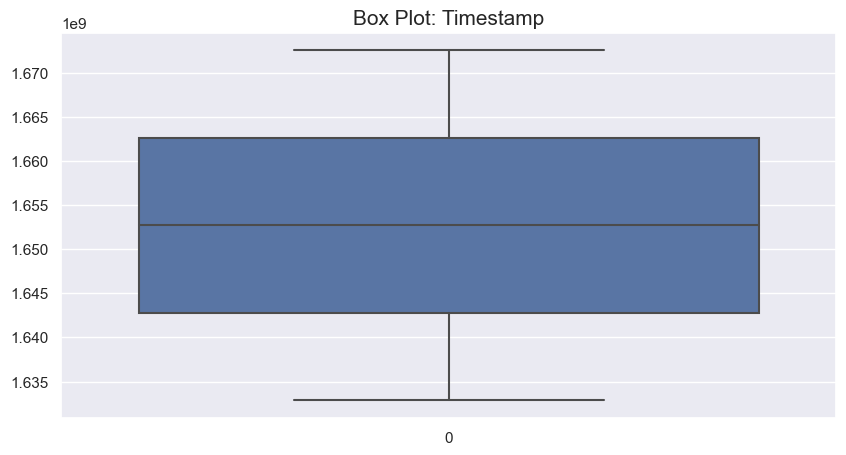

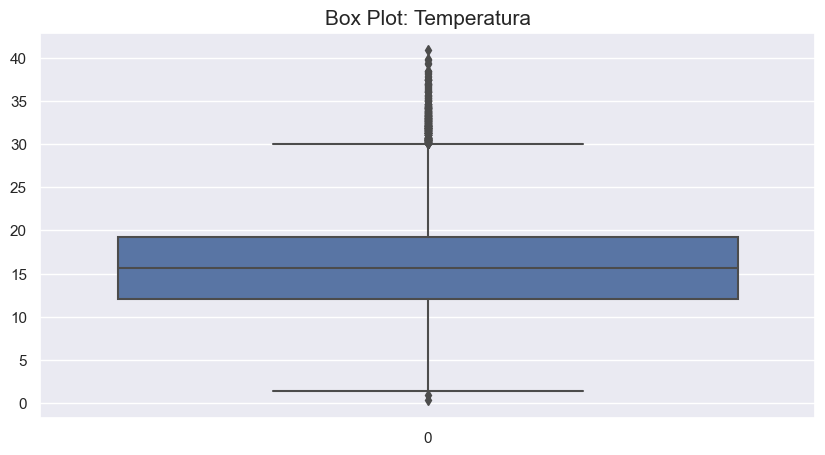

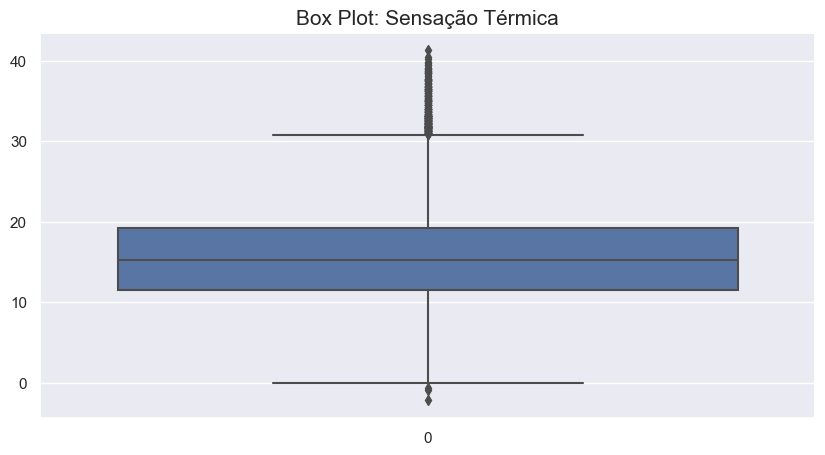

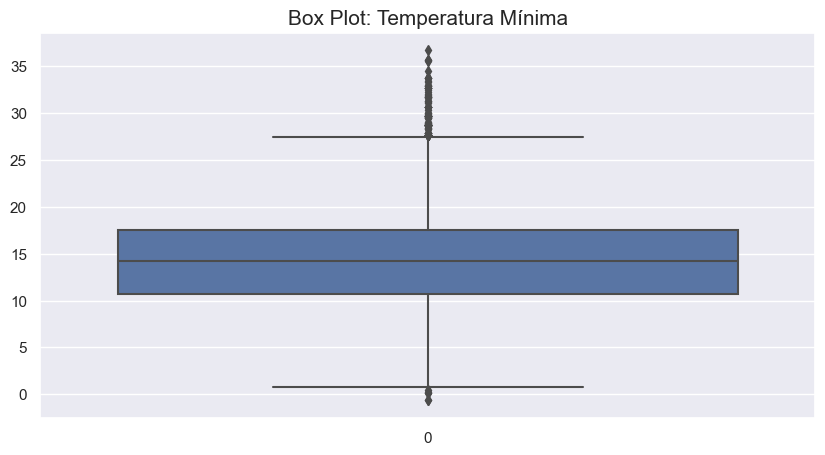

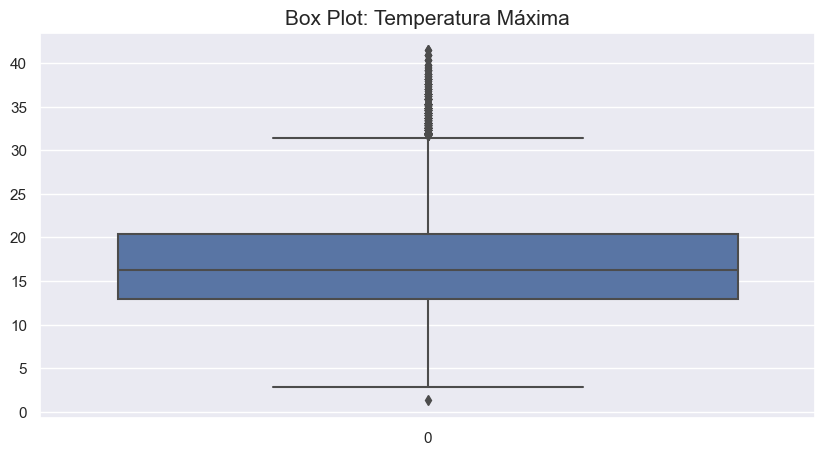

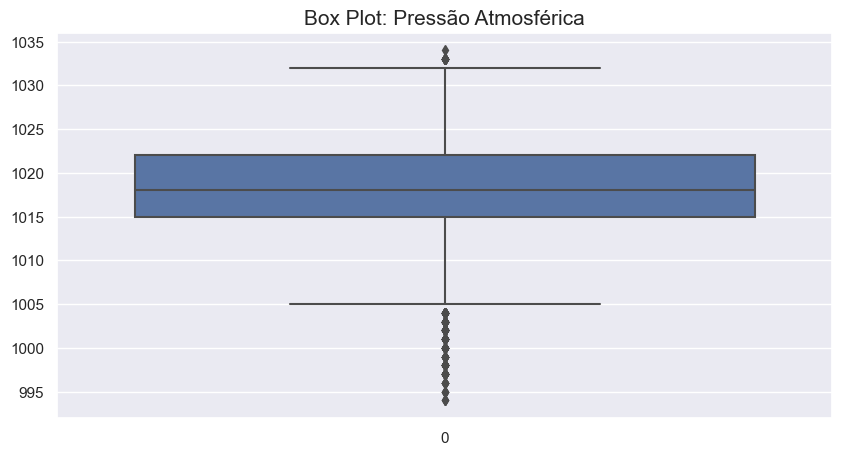

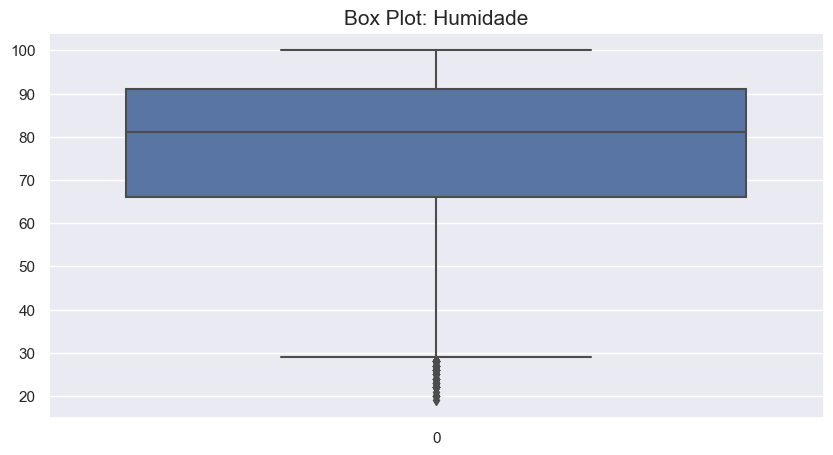

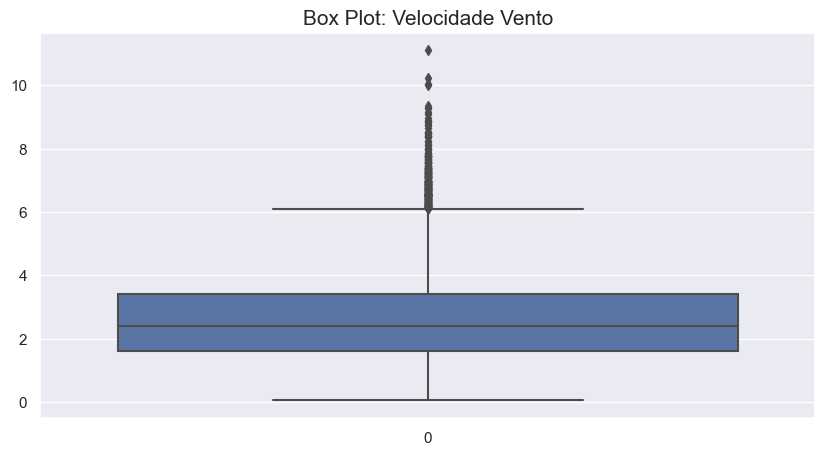

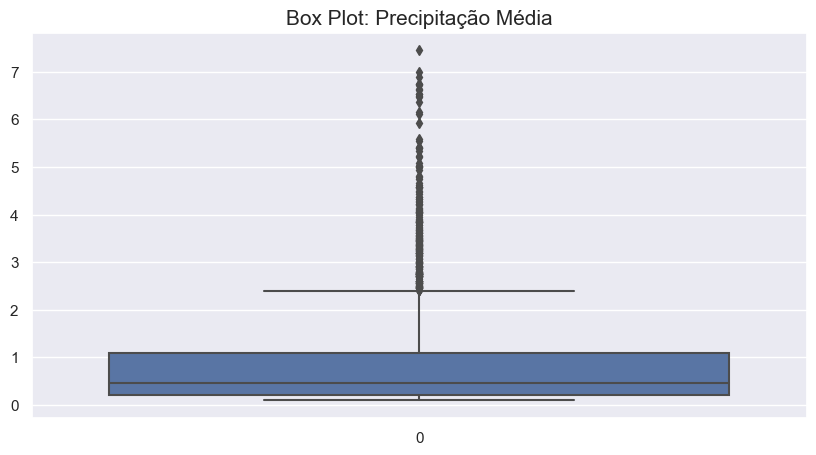

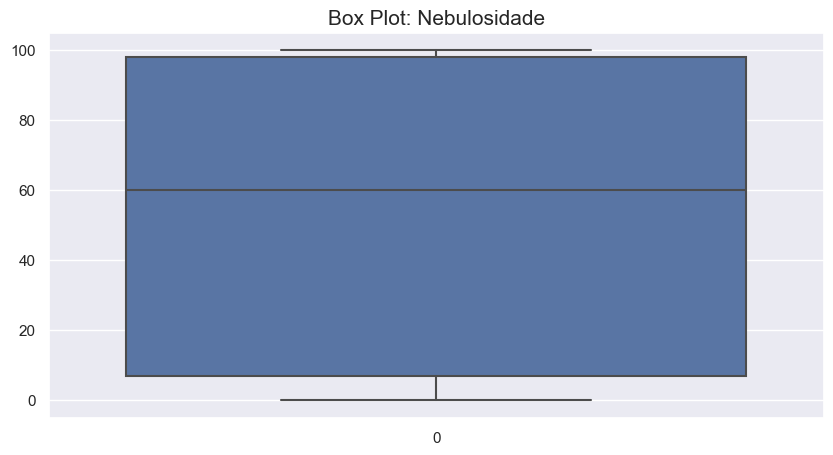

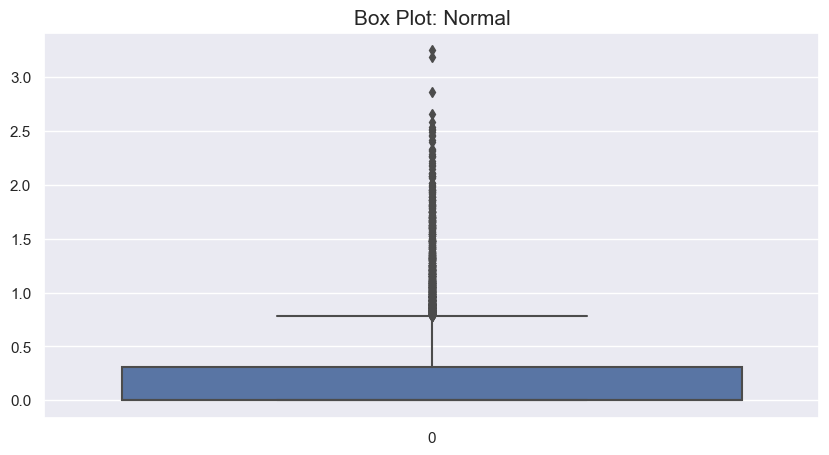

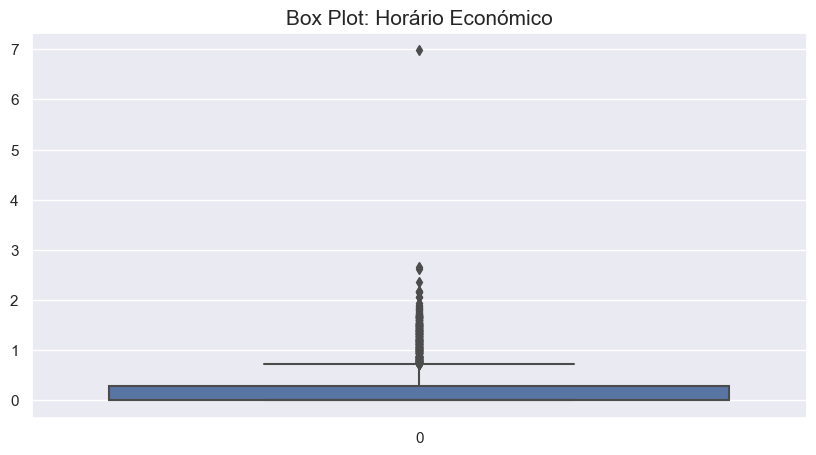

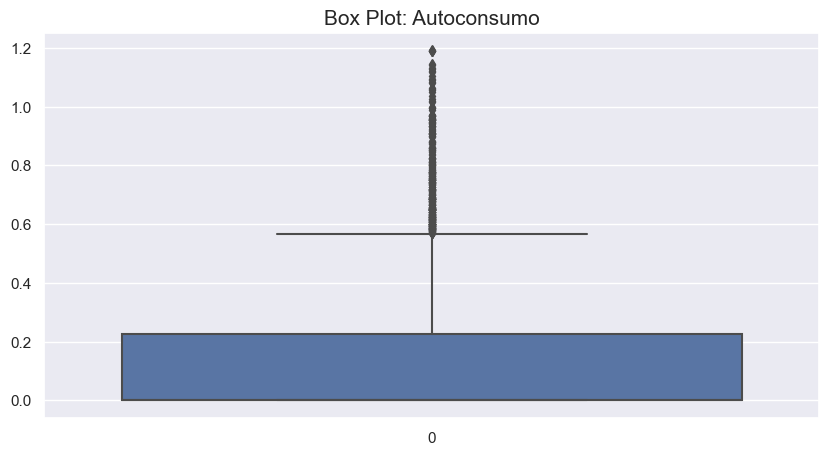

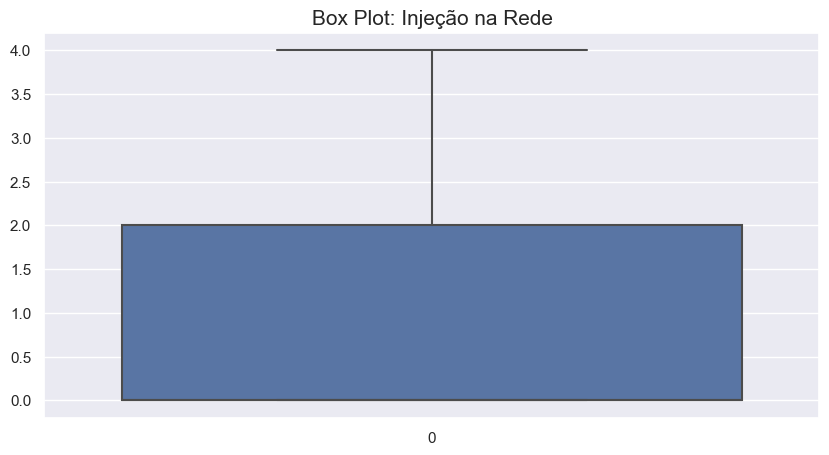

In [2341]:
numeric_collumns = e_m.select_dtypes(include=np.number)
for num in numeric_collumns:
    fig = plt.figure(figsize=(10, 5))
    sns.boxplot(e_m[num])
    plt.title('Box Plot: ' + num, fontsize=15)
    plt.show()

In [2342]:
def get_outliers(lower,upper,field):
    Q1 = e_m[field].quantile(0.25)
    Q3 = e_m[field].quantile(0.75)
    IQR = Q3-Q1

    lower_lim = Q1 - lower * IQR
    upper_lim = Q3 + upper * IQR

    out_low = (e_m[field]<lower_lim)
    out_up = (e_m[field]>upper_lim)

    return [out_low,out_up]

#### Dropping Outliers

##### Temperatura

In [2343]:
outliers_low, outliers_up = get_outliers(1.5,1.43,'Temperatura')

In [2344]:
e_m_drop_temp = e_m.copy()
e_m_drop_temp = e_m[~(outliers_low|outliers_up)]

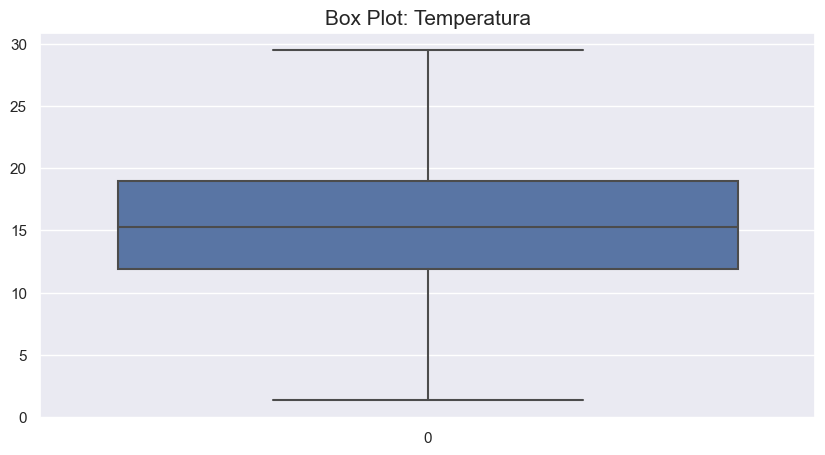

In [2345]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_drop_temp['Temperatura'])
plt.title('Box Plot: Temperatura', fontsize=15)
plt.show()

##### Sensação Térmica

In [2346]:
outliers_low, outliers_up = get_outliers(1.44,1.38,'Sensação Térmica')

In [2347]:
e_m_drop_senter = e_m.copy()
e_m_drop_senter = e_m[~(outliers_low|outliers_up)]

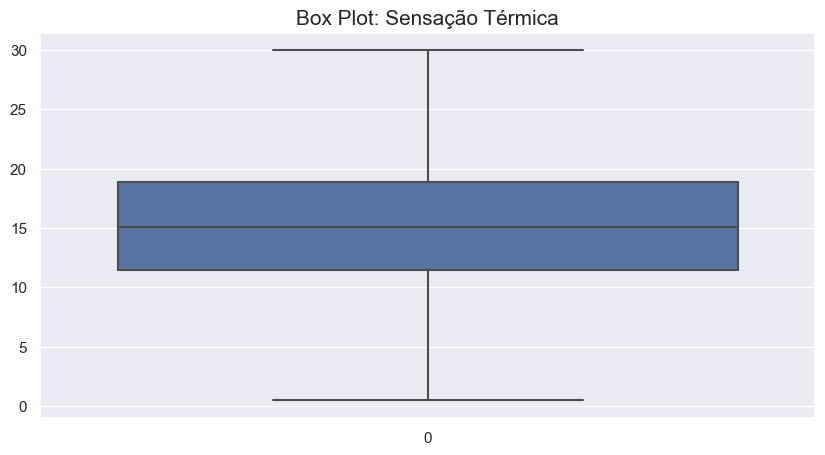

In [2348]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_drop_senter['Sensação Térmica'])
plt.title('Box Plot: Sensação Térmica', fontsize=15)
plt.show()

##### Temperatura Mínima

In [2349]:
outliers_low, outliers_up = get_outliers(1.46,1.4,'Temperatura Mínima')

In [2350]:
e_m_drop_tempmin = e_m.copy()
e_m_drop_tempmin = e_m[~(outliers_low|outliers_up)]

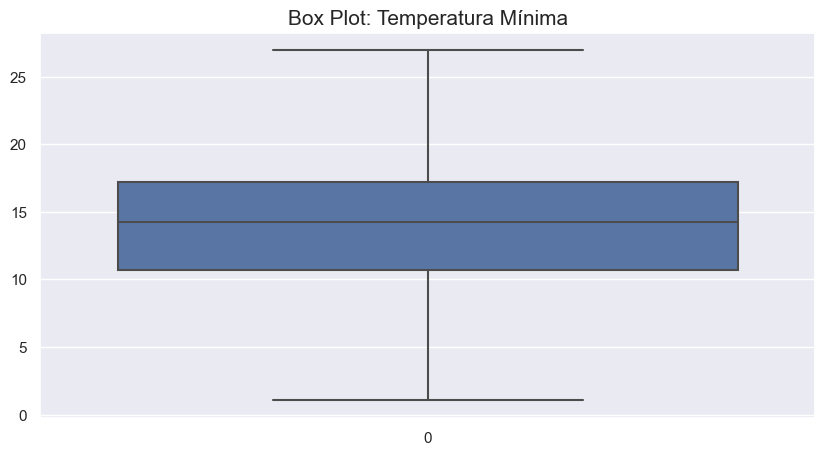

In [2351]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_drop_tempmin['Temperatura Mínima'])
plt.title('Box Plot: Temperatura Mínima', fontsize=15)
plt.show()

##### Temperatura Máxima

In [2352]:
outliers_low, outliers_up = get_outliers(1.55,1.31,'Temperatura Máxima')

In [2353]:
e_m_drop_tempmax = e_m.copy()
e_m_drop_tempmax = e_m[~(outliers_low|outliers_up)]

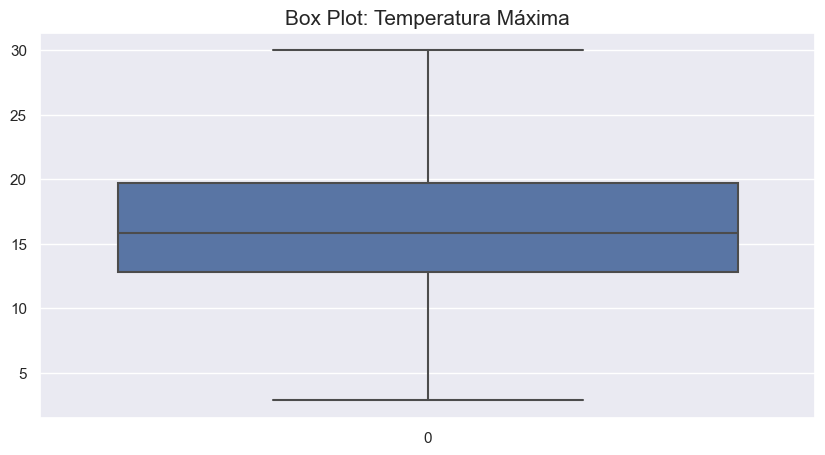

In [2354]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_drop_tempmax['Temperatura Máxima'])
plt.title('Box Plot: Temperatura Máxima', fontsize=15)
plt.show()

##### Pressão Atmosférica

In [2355]:
outliers_low, outliers_up = get_outliers(1.85,1.8,'Pressão Atmosférica')

In [2356]:
e_m_drop_pressaoA = e_m.copy()
e_m_drop_pressaoA = e_m[~(outliers_low|outliers_up)]

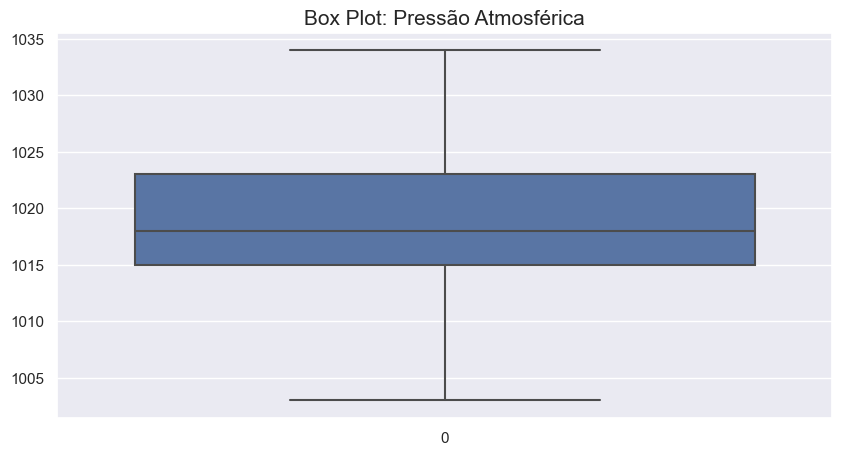

In [2357]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_drop_pressaoA['Pressão Atmosférica'])
plt.title('Box Plot: Pressão Atmosférica', fontsize=15)
plt.show()

##### Humidade

In [2358]:
outliers_low, outliers_up = get_outliers(1.51,1.5,'Humidade')

In [2359]:
e_m_drop_humidade = e_m.copy()
e_m_drop_humidade = e_m[~(outliers_low|outliers_up)]

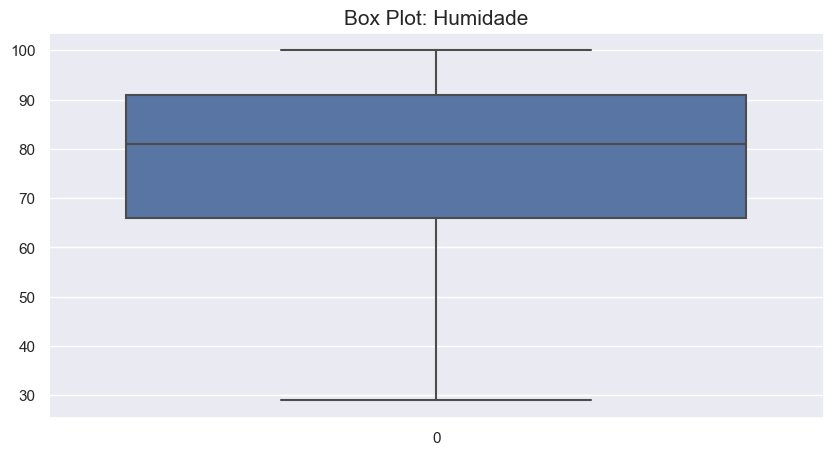

In [2360]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_drop_humidade['Humidade'])
plt.title('Box Plot: Humidade', fontsize=15)
plt.show()

##### Velocidade Vento

In [2361]:
outliers_low, outliers_up = get_outliers(1,1.32,'Velocidade Vento')

In [2362]:
e_m_drop_velvento = e_m.copy()
e_m_drop_velvento = e_m[~(outliers_low|outliers_up)]

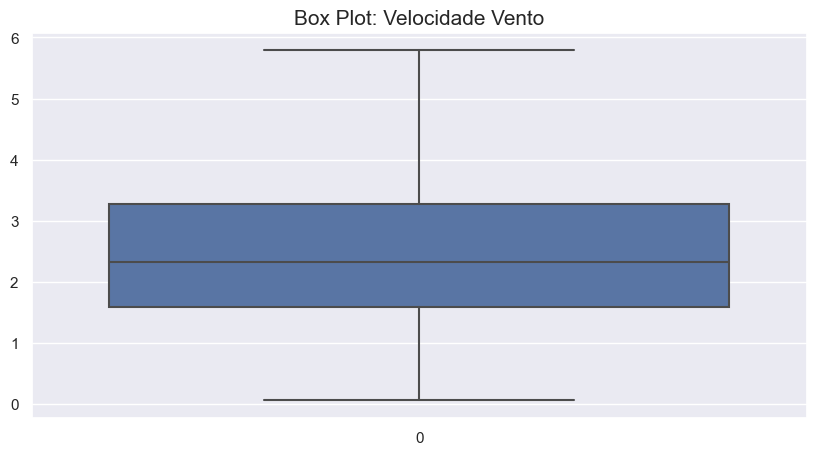

In [2363]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_drop_velvento['Velocidade Vento'])
plt.title('Box Plot: Velocidade Vento', fontsize=15)
plt.show()

##### Precipitação Média

In [2364]:
outliers_low, outliers_up = get_outliers(1.5,0.1,'Precipitação Média')

In [2365]:
e_m['Precipitação Média'][outliers_low|outliers_up]

93       2.00
94       3.00
95       3.00
96       4.00
97       7.00
         ... 
11011    3.58
11012    4.20
11013    4.23
11014    3.90
11015    4.07
Name: Precipitação Média, Length: 532, dtype: float64

In [2366]:
e_m_drop_precipitacao = e_m.copy()
e_m_drop_precipitacao = e_m[~(outliers_low|outliers_up)]

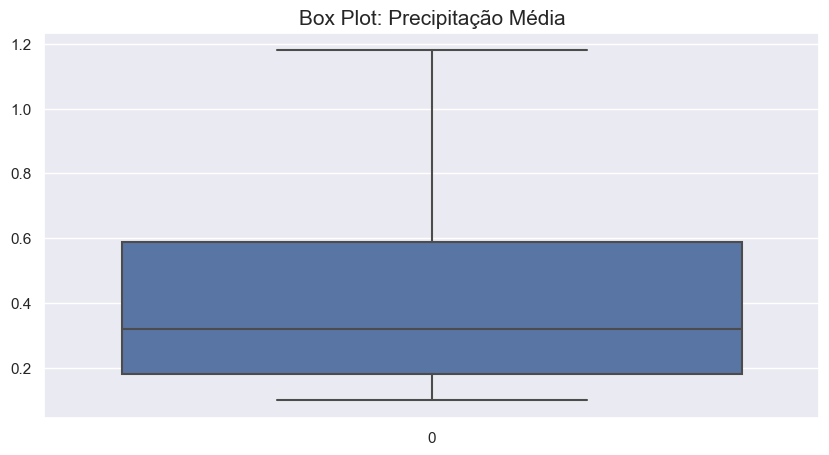

In [2367]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_drop_precipitacao['Precipitação Média'])
plt.title('Box Plot: Precipitação Média', fontsize=15)
plt.show()

##### Normal

In [2368]:
outliers_low, outliers_up = get_outliers(1.5,4,'Normal')

In [2369]:
e_m['Normal'][outliers_low|outliers_up]

451      2.077
643      1.952
780      1.888
782      1.590
955      1.649
         ...  
10867    1.664
10963    2.270
11009    2.101
11010    2.334
11011    1.693
Name: Normal, Length: 129, dtype: float64

In [2370]:
e_m_drop_normal = e_m.copy()
e_m_drop_normal = e_m[~(outliers_low|outliers_up)]

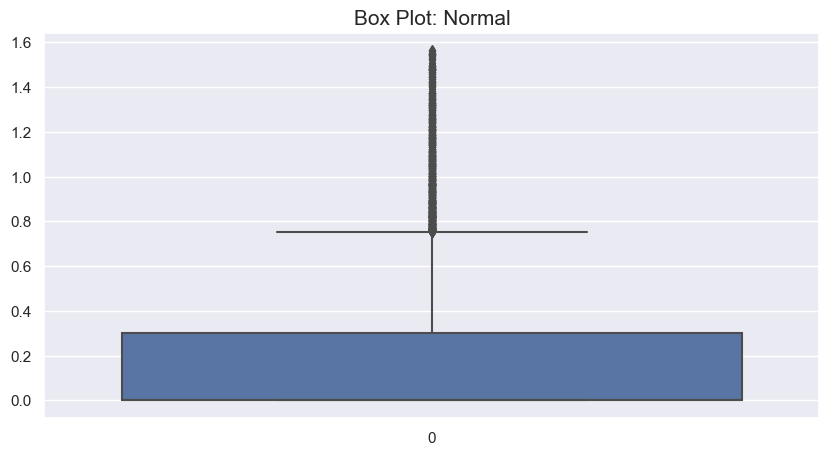

In [2371]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_drop_normal['Normal'])
plt.title('Box Plot: Normal', fontsize=15)
plt.show()

##### Horário Económico

In [2372]:
outliers_low, outliers_up = get_outliers(1.5,1.34,'Horário Económico')

In [2373]:
e_m_drop_he = e_m.copy()
e_m_drop_he = e_m[~(outliers_low|outliers_up)]

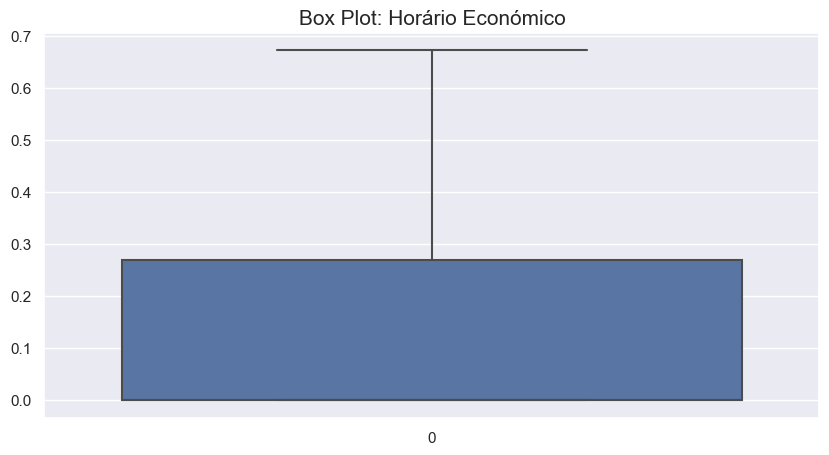

In [2374]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_drop_he['Horário Económico'])
plt.title('Box Plot: Horário Económico', fontsize=15)
plt.show()

##### Autoconsumo

In [2375]:
outliers_low, outliers_up = get_outliers(1.5,1.23,'Autoconsumo')

In [2376]:
e_m_drop_autoconsumo = e_m.copy()
e_m_drop_autoconsumo = e_m[~(outliers_low|outliers_up)]

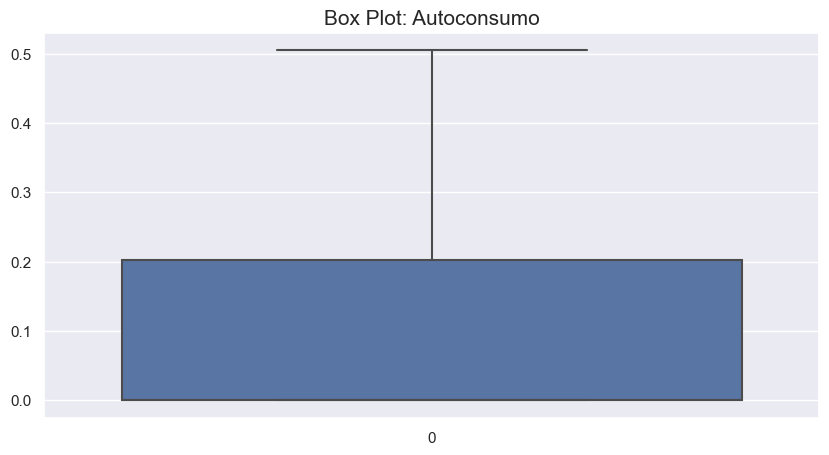

In [2377]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_drop_autoconsumo['Autoconsumo'])
plt.title('Box Plot: Autoconsumo', fontsize=15)
plt.show()

#### Winsorize Method

In [2378]:
from scipy.stats.mstats import winsorize

In [2379]:
e_m['Temperatura'].quantile(0.006)

4.98

In [2380]:
e_m['Temperatura'].quantile(0.97)

29.14

In [2381]:
e_m_win_temp = e_m.copy()
e_m_win_temp['Temperatura'] = winsorize(e_m_win_temp['Temperatura'], (0.006,0.03))

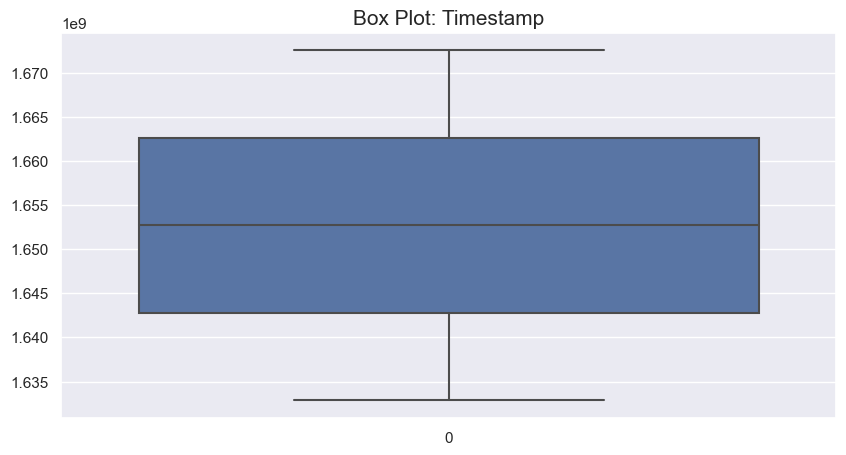

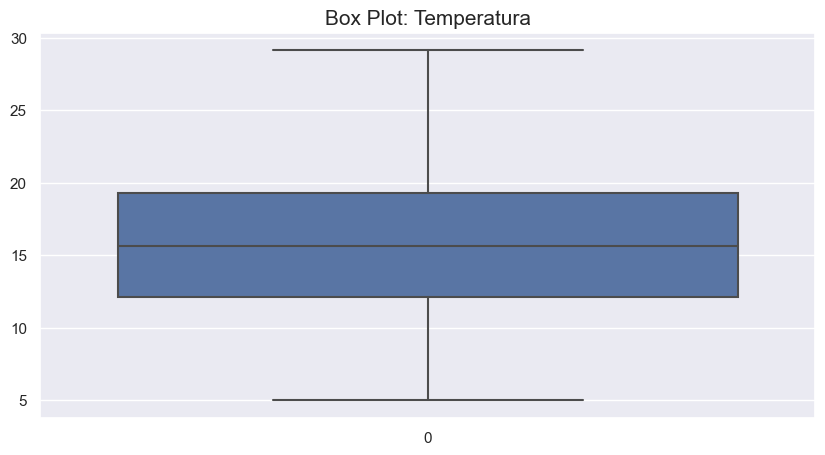

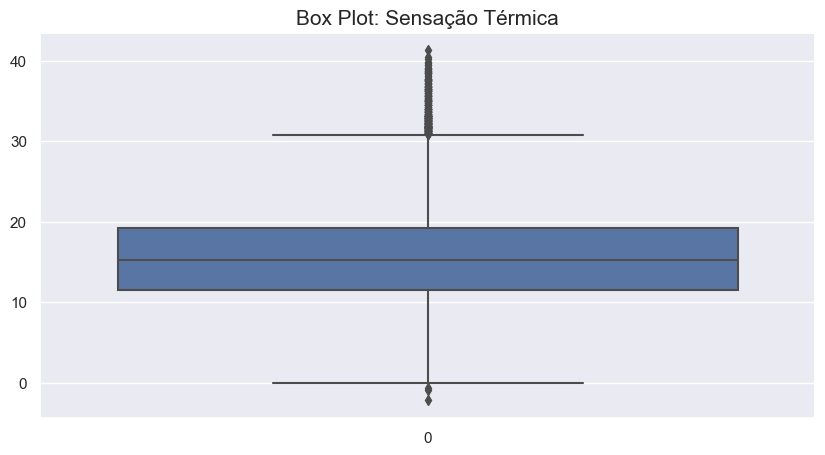

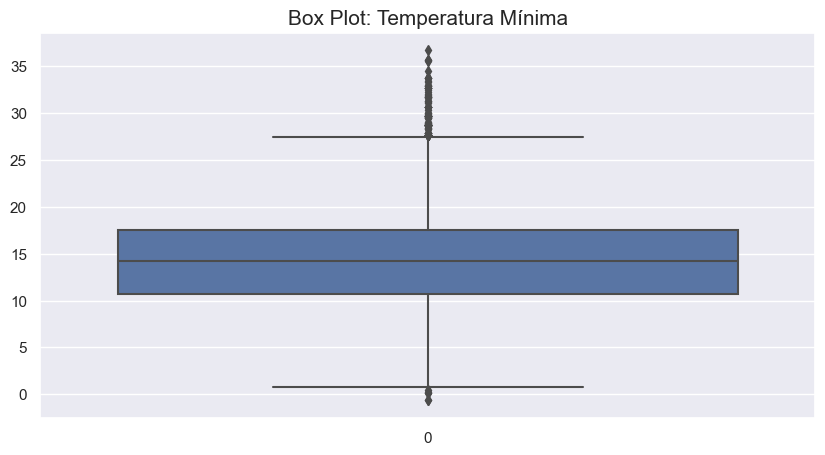

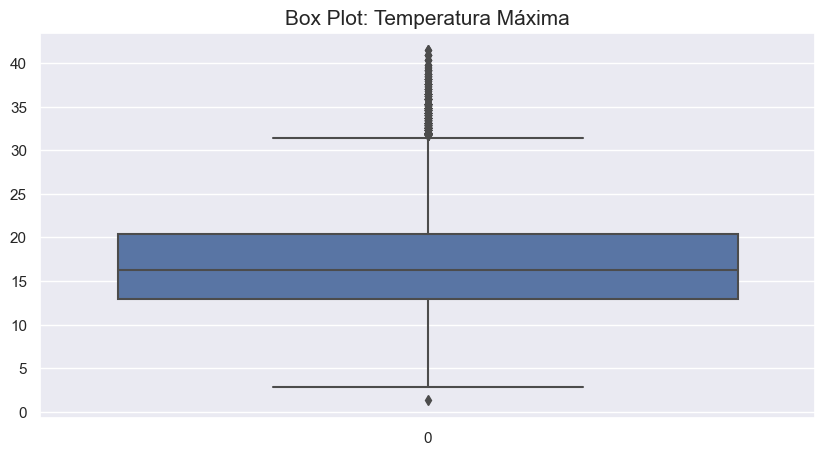

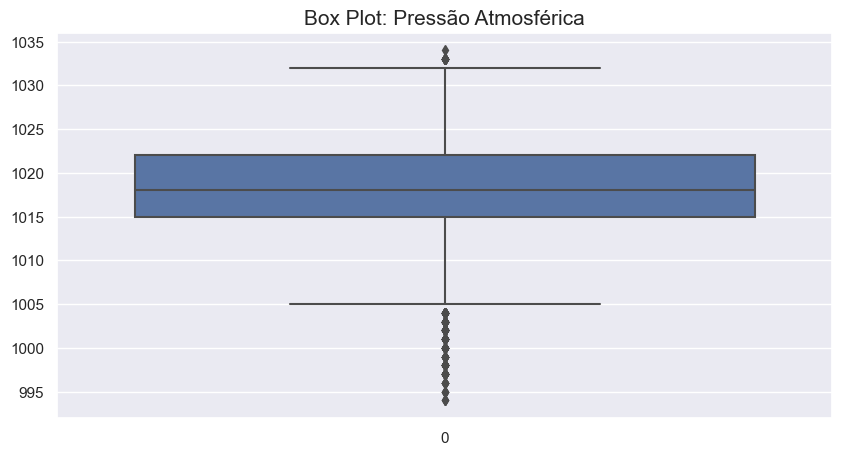

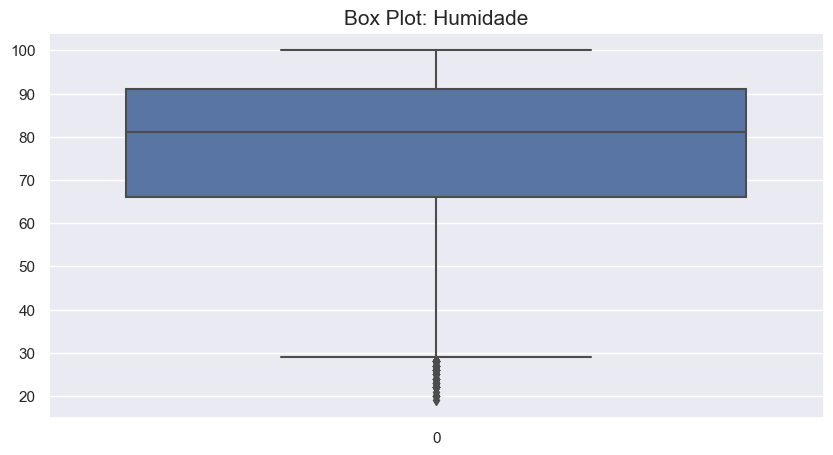

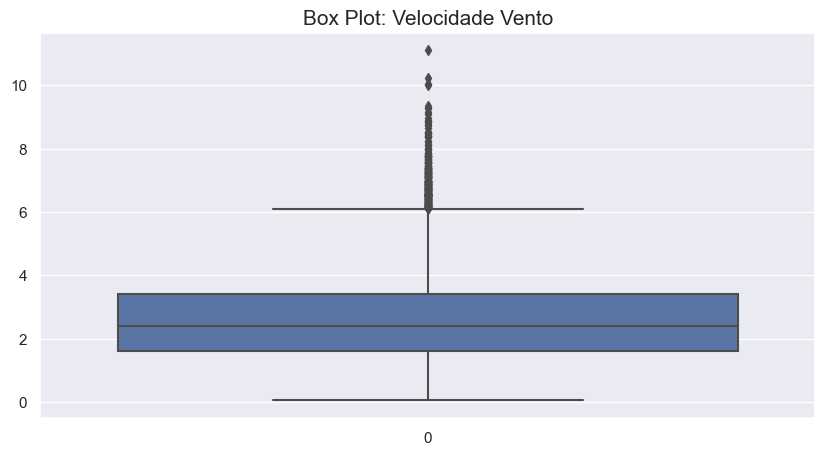

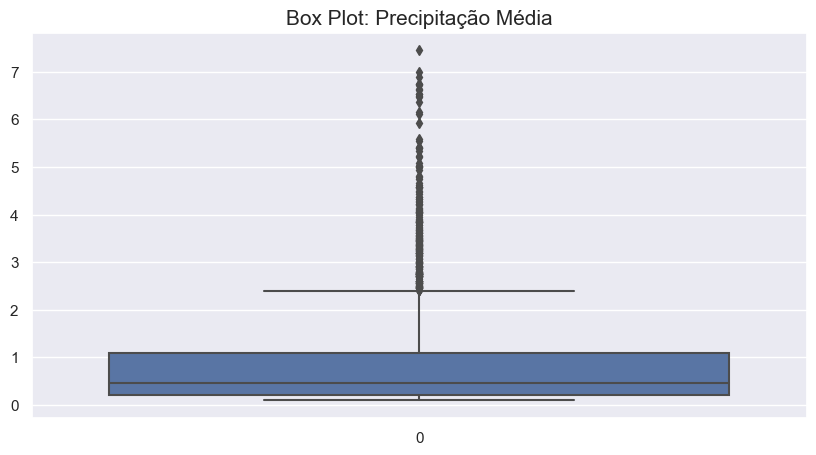

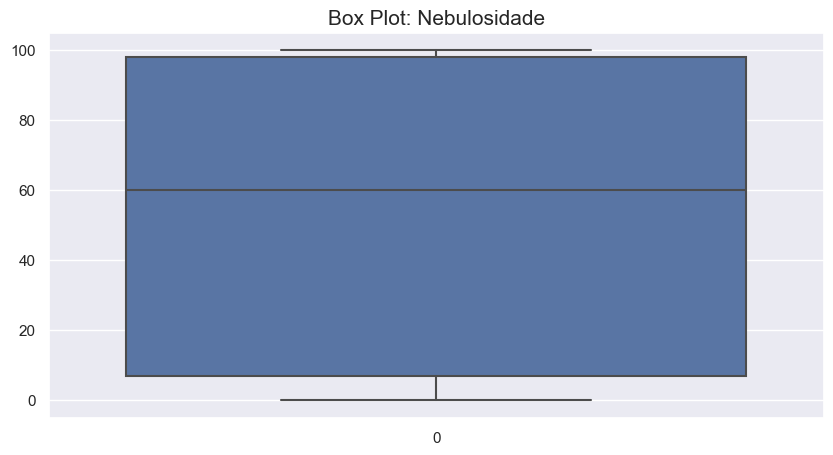

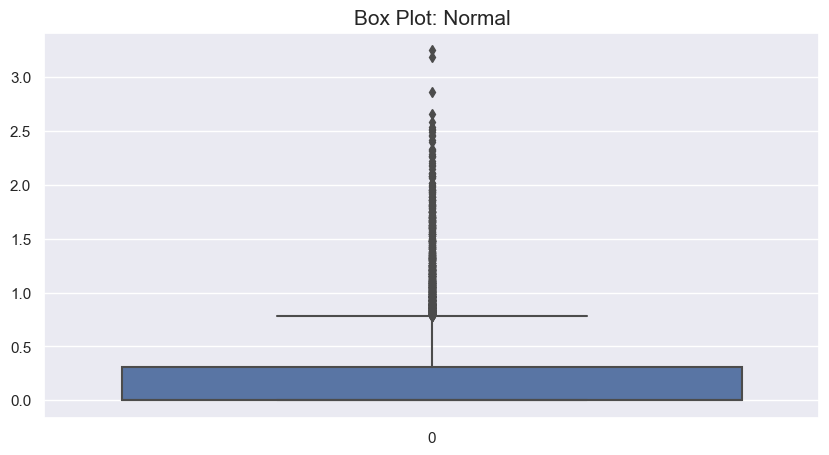

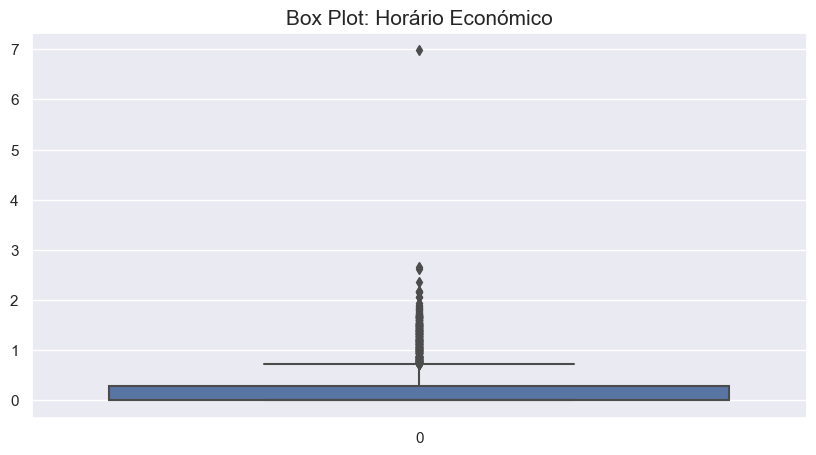

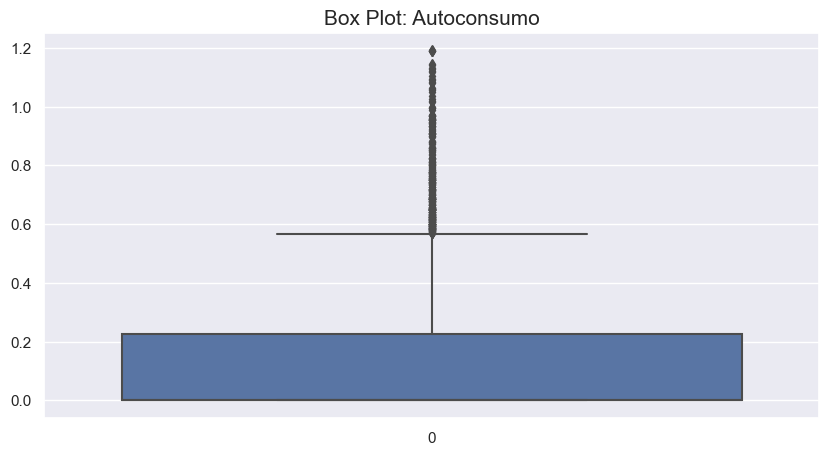

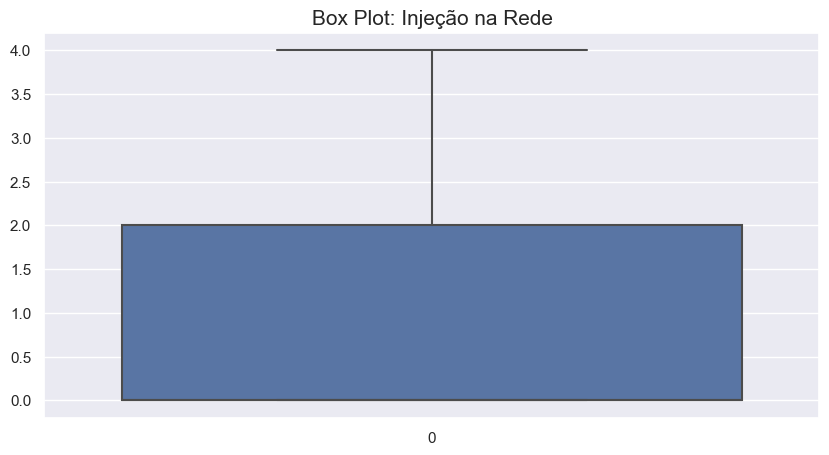

In [2382]:
numeric_collumns = e_m_win_temp.select_dtypes(include=np.number)
for num in numeric_collumns:
    fig = plt.figure(figsize=(10, 5))
    sns.boxplot(e_m_win_temp[num])
    plt.title('Box Plot: ' + num, fontsize=15)
    plt.show()

#### Log Transformation

In [2383]:
e_m_log_tempmax = e_m.copy()
e_m_log_tempmax['Temperatura Máxima'] = np.log(e_m_log_tempmax['Temperatura Máxima'])

In [2384]:
e_m_log_tempmax['Temperatura Máxima'].head()

0    2.641910
1    2.631889
2    2.597491
3    2.559550
4    2.559550
Name: Temperatura Máxima, dtype: float64

In [2385]:
e_m['Temperatura Máxima'].head()

0    14.04
1    13.90
2    13.43
3    12.93
4    12.93
Name: Temperatura Máxima, dtype: float64

#### Substituição dos Outliers pela mediana

##### Temperatura

In [2386]:
outliers_low, outliers_up = get_outliers(1.31,1.21,'Temperatura')

median = e_m['Temperatura'].median()

# Criando uma cópia do DataFrame
e_m_replace_temp = e_m.copy()

# Substituindo os outliers na coluna 'Temperatura' pelo valor da mediana
e_m_replace_temp.loc[outliers_low | outliers_up, 'Temperatura'] = median

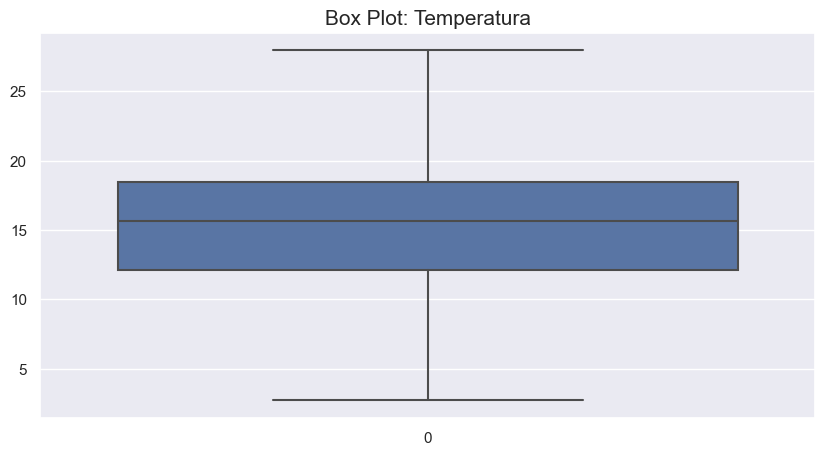

In [2387]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_replace_temp['Temperatura'])
plt.title('Box Plot: Temperatura', fontsize=15)
plt.show()

##### Sensação Térmica

In [2388]:
outliers_low, outliers_up = get_outliers(1.39,1.3,'Sensação Térmica')

median = e_m['Sensação Térmica'].median()

# Criando uma cópia do DataFrame
e_m_replace_senter = e_m.copy()

# Substituindo os outliers na coluna 'Temperatura' pelo valor da mediana
e_m_replace_senter.loc[outliers_low | outliers_up, 'Sensação Térmica'] = median

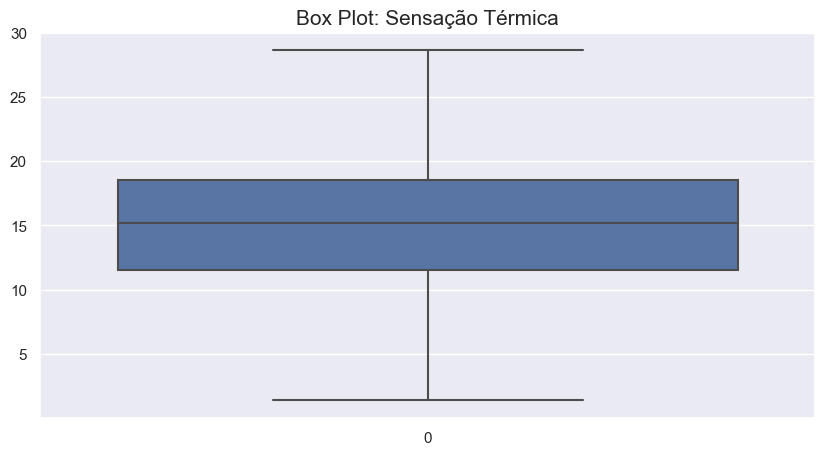

In [2389]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_replace_senter['Sensação Térmica'])
plt.title('Box Plot: Sensação Térmica', fontsize=15)
plt.show()

##### Temperatura Mínima

In [2390]:
outliers_low, outliers_up = get_outliers(1.46,1.4,'Temperatura Mínima')

median = e_m['Temperatura Mínima'].median()

# Criando uma cópia do DataFrame
e_m_replace_tempmin = e_m.copy()

# Substituindo os outliers na coluna 'Temperatura' pelo valor da mediana
e_m_replace_tempmin.loc[outliers_low | outliers_up, 'Temperatura Mínima'] = median

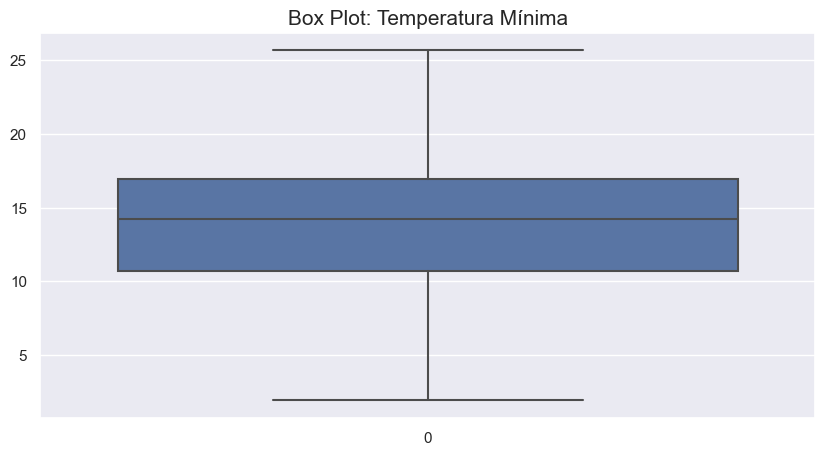

In [2391]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_replace_tempmin['Temperatura Mínima'])
plt.title('Box Plot: Temperatura Mínima', fontsize=15)
plt.show()

##### Temperatura Máxima

In [2392]:
outliers_low, outliers_up = get_outliers(1.34,1.23,'Temperatura Máxima')

median = e_m['Temperatura Máxima'].median()

# Criando uma cópia do DataFrame
e_m_replace_tempmax = e_m.copy()

# Substituindo os outliers na coluna 'Temperatura' pelo valor da mediana
e_m_replace_tempmax.loc[outliers_low | outliers_up, 'Temperatura Máxima'] = median

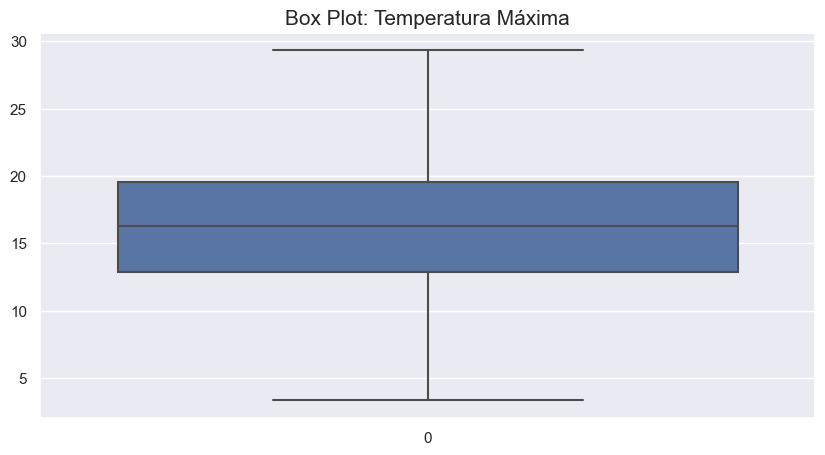

In [2393]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_replace_tempmax['Temperatura Máxima'])
plt.title('Box Plot: Temperatura Máxima', fontsize=15)
plt.show()

##### Pressão Atmosférica

In [2394]:
outliers_low, outliers_up = get_outliers(1.57,1.57,'Pressão Atmosférica')

median = e_m['Pressão Atmosférica'].median()

# Criando uma cópia do DataFrame
e_m_replace_pressaoA = e_m.copy()

# Substituindo os outliers na coluna 'Temperatura' pelo valor da mediana
e_m_replace_pressaoA.loc[outliers_low | outliers_up, 'Pressão Atmosférica'] = median

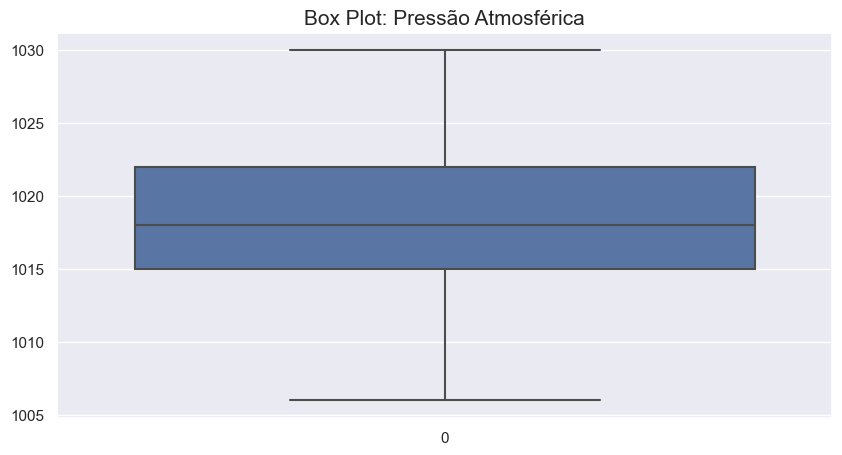

In [2395]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_replace_pressaoA['Pressão Atmosférica'])
plt.title('Box Plot: Pressão Atmosférica', fontsize=15)
plt.show()

##### Humidade

In [2396]:
outliers_low, outliers_up = get_outliers(1.51,1.5,'Humidade')

median = e_m['Humidade'].median()

# Criando uma cópia do DataFrame
e_m_replace_humidade = e_m.copy()

# Substituindo os outliers na coluna 'Temperatura' pelo valor da mediana
e_m_replace_humidade.loc[outliers_low | outliers_up, 'Humidade'] = median

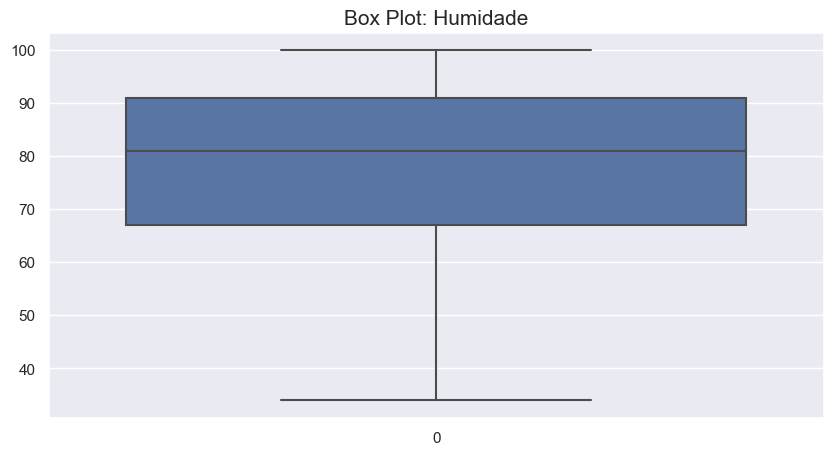

In [2397]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_replace_humidade['Humidade'])
plt.title('Box Plot: Humidade', fontsize=15)
plt.show()

##### Velocidade Vento

In [2398]:
outliers_low, outliers_up = get_outliers(1.5,1.15,'Velocidade Vento')

median = e_m['Velocidade Vento'].median()

# Criando uma cópia do DataFrame
e_m_replace_velvento = e_m.copy()

# Substituindo os outliers na coluna 'Temperatura' pelo valor da mediana
e_m_replace_velvento.loc[outliers_low | outliers_up, 'Velocidade Vento'] = median

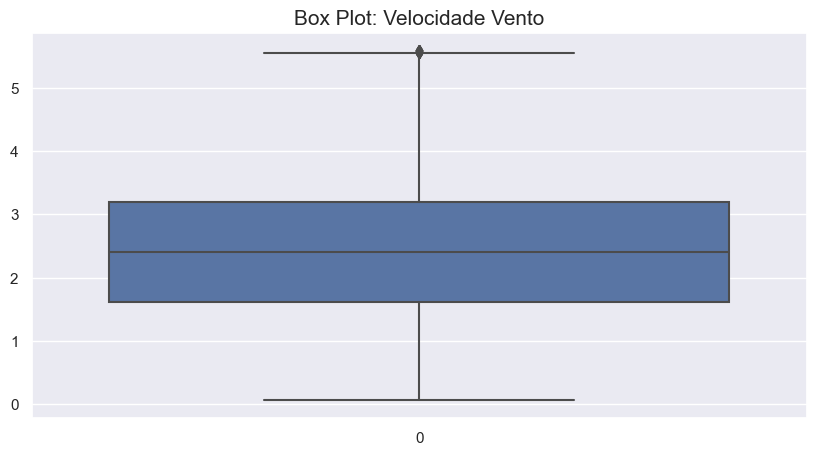

In [2399]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_replace_velvento['Velocidade Vento'])
plt.title('Box Plot: Velocidade Vento', fontsize=15)
plt.show()

##### Precipitação Média

In [2400]:
outliers_low, outliers_up = get_outliers(1.31,1.21,'Precipitação Média')

median = e_m['Precipitação Média'].median()

# Criando uma cópia do DataFrame
e_m_replace_precipitacao = e_m.copy()

# Substituindo os outliers na coluna 'Temperatura' pelo valor da mediana
e_m_replace_precipitacao.loc[outliers_low | outliers_up, 'Precipitação Média'] = median

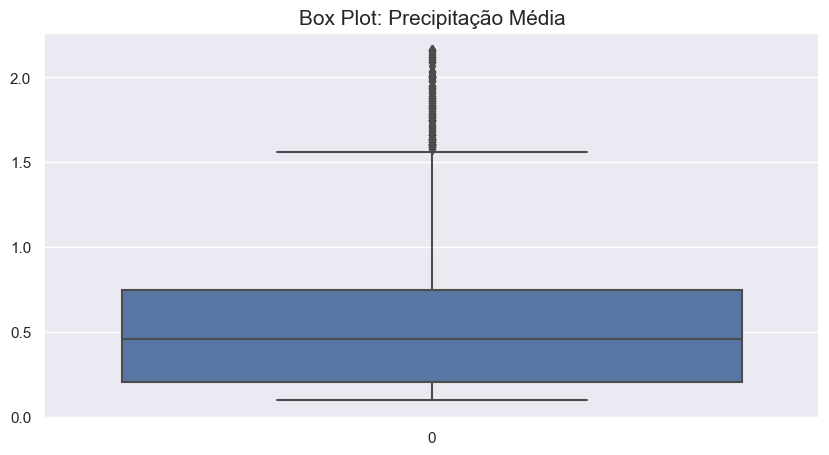

In [2401]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_replace_precipitacao['Precipitação Média'])
plt.title('Box Plot: Precipitação Média', fontsize=15)
plt.show()

##### Normal

In [2402]:
outliers_low, outliers_up = get_outliers(1.31,1.21,'Normal')

median = e_m['Normal'].median()

# Criando uma cópia do DataFrame
e_m_replace_normal = e_m.copy()

# Substituindo os outliers na coluna 'Temperatura' pelo valor da mediana
e_m_replace_normal.loc[outliers_low | outliers_up, 'Normal'] = median

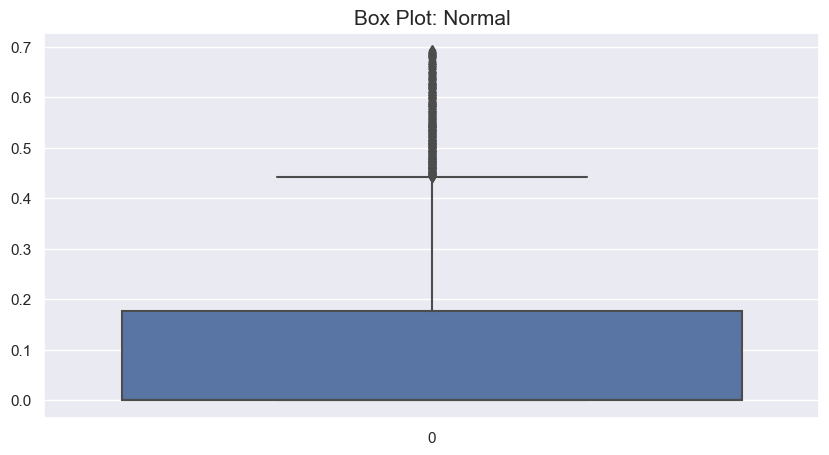

In [2403]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_replace_normal['Normal'])
plt.title('Box Plot: Normal', fontsize=15)
plt.show()

##### Horário Económico

In [2404]:
outliers_low, outliers_up = get_outliers(1.5,1.3,'Horário Económico')

median = e_m['Horário Económico'].median()

# Criando uma cópia do DataFrame
e_m_replace_he = e_m.copy()

# Substituindo os outliers na coluna 'Temperatura' pelo valor da mediana
e_m_replace_he.loc[outliers_low | outliers_up, 'Horário Económico'] = median

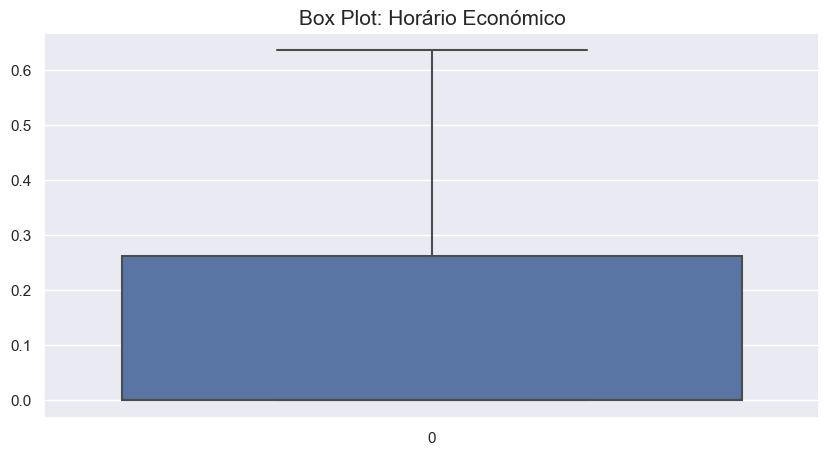

In [2405]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_replace_he['Horário Económico'])
plt.title('Box Plot: Horário Económico', fontsize=15)
plt.show()

##### Autoconsumo

In [2406]:
outliers_low, outliers_up = get_outliers(1.5,1.14,'Autoconsumo')

median = e_m['Autoconsumo'].median()

# Criando uma cópia do DataFrame
e_m_replace_autoconsumo = e_m.copy()

# Substituindo os outliers na coluna 'Temperatura' pelo valor da mediana
e_m_replace_autoconsumo.loc[outliers_low | outliers_up, 'Autoconsumo'] = median

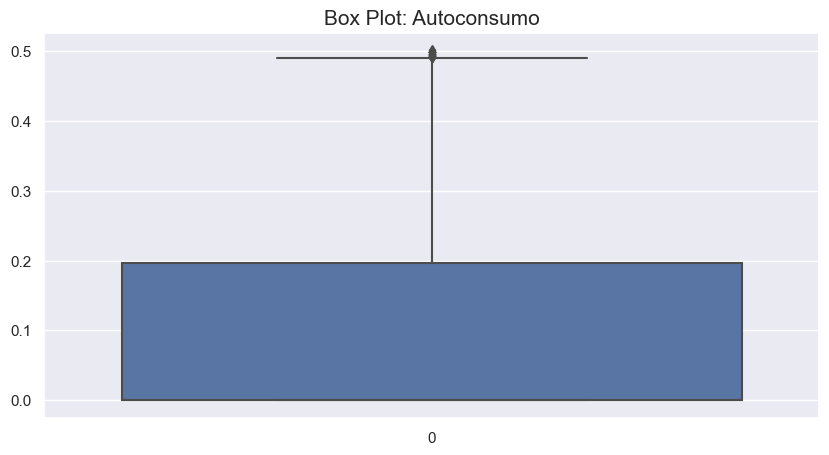

In [2407]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(e_m_replace_autoconsumo['Autoconsumo'])
plt.title('Box Plot: Autoconsumo', fontsize=15)
plt.show()

### Tratamento de Missing Values

In [2408]:
print(e_m.isna().sum())

Timestamp                 0
Temperatura               0
Sensação Térmica          0
Temperatura Mínima        0
Temperatura Máxima        0
Pressão Atmosférica       0
Humidade                  0
Velocidade Vento          0
Precipitação Média     8732
Nebulosidade              0
Estado do Tempo           0
Normal                    0
Horário Económico         0
Autoconsumo               0
Injeção na Rede           0
dtype: int64


In [2409]:
print(teste_10.isna().sum())

Timestamp                 0
Temperatura             504
Sensação Térmica        504
Temperatura Mínima      504
Temperatura Máxima      504
Pressão Atmosférica     504
Humidade                504
Velocidade Vento        504
Precipitação Média     2050
Nebulosidade            504
Estado do Tempo           0
Normal                    0
Horário Económico         0
Autoconsumo               0
dtype: int64


#### Precipitação Média

In [2410]:
e_m['Precipitação Média'].describe()

count    2284.000000
mean        0.896642
std         1.079381
min         0.100000
25%         0.210000
50%         0.460000
75%         1.092500
max         7.450000
Name: Precipitação Média, dtype: float64

In [2411]:
e_m['Precipitação Média'].skew()

2.4349045847675654

In [2412]:
e_m['Precipitação Média'].kurt()

7.108283823477523

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


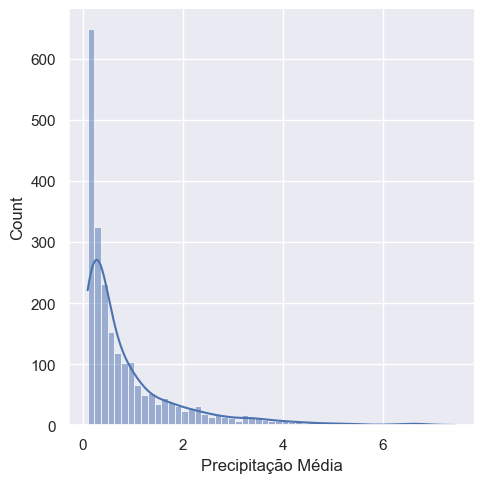

In [2413]:
sns.displot(e_m, x='Precipitação Média', kde=True)

Remover a coluna

In [2414]:
e_m_missing_1 = e_m.copy() 

In [2415]:
e_m_missing_1.drop(['Precipitação Média'], axis=1, inplace=True)
e_m_missing_1.columns

Index(['Timestamp', 'Temperatura', 'Sensação Térmica', 'Temperatura Mínima',
       'Temperatura Máxima', 'Pressão Atmosférica', 'Humidade',
       'Velocidade Vento', 'Nebulosidade', 'Estado do Tempo', 'Normal',
       'Horário Económico', 'Autoconsumo', 'Injeção na Rede'],
      dtype='object')

In [2416]:
teste_missing_1 = teste_10.copy() 

In [2417]:
teste_missing_1.drop(['Precipitação Média'], axis=1, inplace=True)
teste_missing_1.columns

Index(['Timestamp', 'Temperatura', 'Sensação Térmica', 'Temperatura Mínima',
       'Temperatura Máxima', 'Pressão Atmosférica', 'Humidade',
       'Velocidade Vento', 'Nebulosidade', 'Estado do Tempo', 'Normal',
       'Horário Económico', 'Autoconsumo'],
      dtype='object')

Substituir os valores NaN pela mediana

In [2418]:
e_m_missing_2 = e_m.copy()

In [2419]:
def substitute_mean(row):
    if pd.isna(row['Precipitação Média']):
        return e_m_missing_2['Precipitação Média'].median()
    return row['Precipitação Média']

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


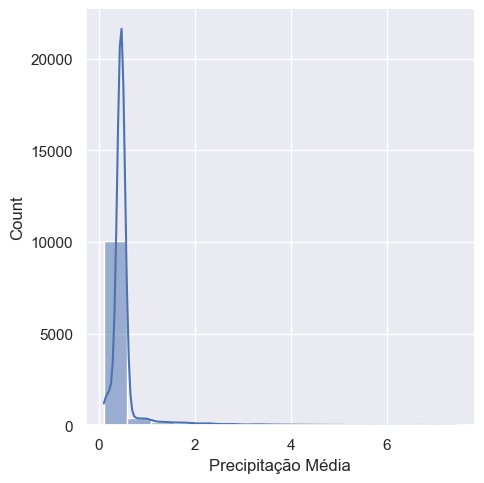

In [2420]:
e_m_missing_2['Precipitação Média'] = e_m_missing_2.apply(substitute_mean, axis=1)
sns.displot(e_m_missing_2, x='Precipitação Média', kde=True)

Substituir os valores NaN pela média

In [2421]:
e_m_missing_3 = e_m.copy()

In [2422]:
def substitute_mean(row):
    if pd.isna(row['Precipitação Média']):
        return e_m_missing_3['Precipitação Média'].mean()
    return row['Precipitação Média']

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


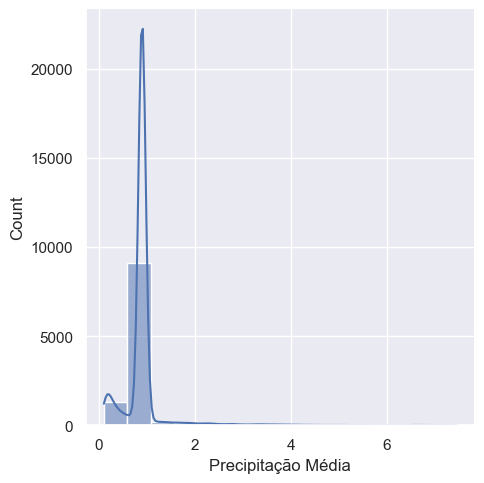

In [2423]:
e_m_missing_3['Precipitação Média'] = e_m_missing_3.apply(substitute_mean, axis=1)
sns.displot(e_m_missing_3, x='Precipitação Média', kde=True)

Interpolação

In [2424]:
e_m_missing_4 = e_m.copy()

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


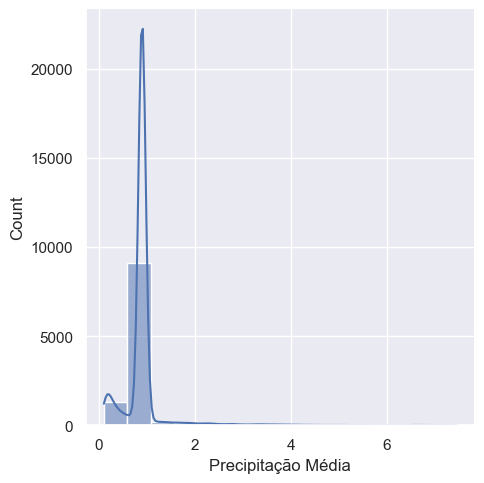

In [2425]:
methods = ["akima", "linear", "quadratic", "cubic"]
e_m_missing_4['Precipitação Média'] = e_m_missing_4['Precipitação Média'].interpolate(method='linear')
sns.displot(e_m_missing_3, x='Precipitação Média', kde=True)

#### Temperatura

In [2426]:
teste_10['Temperatura'].describe()

count    1752.000000
mean       10.599606
std         3.715156
min         0.930000
25%         7.877500
50%        10.950000
75%        13.292500
max        20.610000
Name: Temperatura, dtype: float64

In [2427]:
teste_10['Temperatura'].skew()

-0.11427812538536325

In [2428]:
teste_10['Temperatura'].kurt()

-0.43883227363749455

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


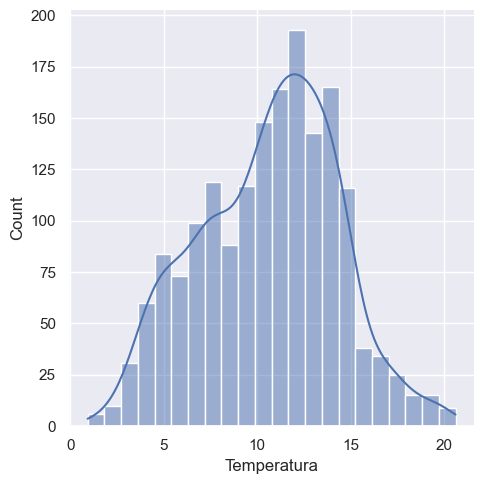

In [2429]:
sns.displot(teste_10, x='Temperatura', kde=True)

Remover a coluna

In [2430]:
teste_missing_2 = teste_10.copy() 

In [2431]:
teste_missing_2.drop(['Temperatura'], axis=1, inplace=True)
teste_missing_2.columns

Index(['Timestamp', 'Sensação Térmica', 'Temperatura Mínima',
       'Temperatura Máxima', 'Pressão Atmosférica', 'Humidade',
       'Velocidade Vento', 'Precipitação Média', 'Nebulosidade',
       'Estado do Tempo', 'Normal', 'Horário Económico', 'Autoconsumo'],
      dtype='object')

Substituir os valores NaN pela mediana

In [2432]:
teste_missing_3 = teste_10.copy()

In [2433]:
def substitute_median(row):
    if pd.isna(row['Temperatura']):
        return teste_missing_3['Temperatura'].median()
    return row['Temperatura']

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


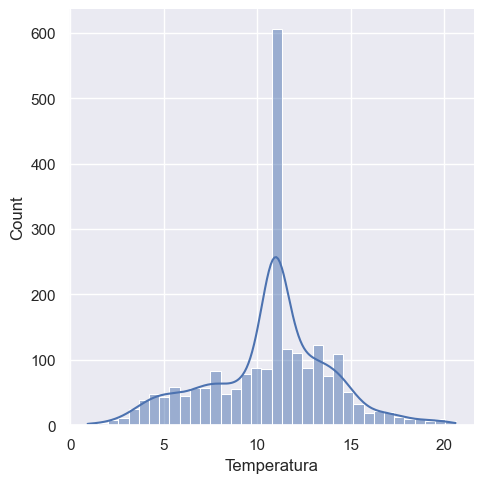

In [2434]:
teste_missing_3['Temperatura'] = teste_missing_3.apply(substitute_median, axis=1)
sns.displot(teste_missing_3, x='Temperatura', kde=True)

Interpolação

In [2435]:
teste_missing_4 = teste_10.copy()

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


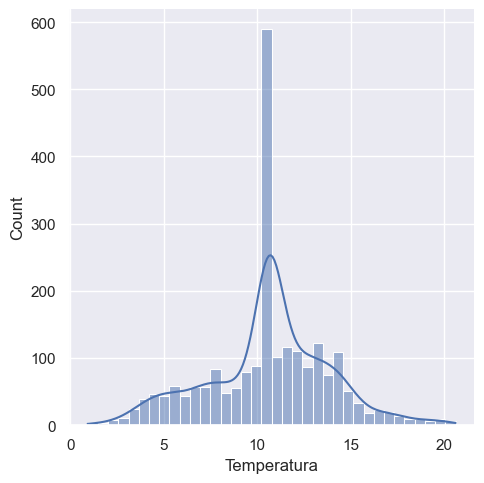

In [2436]:
teste_missing_4['Temperatura'] = teste_missing_4['Temperatura'].interpolate(method='linear')
sns.displot(teste_missing_4, x='Temperatura', kde=True)

In [2437]:
print(teste_missing_4['Temperatura'].isna().sum())

0


#### Sensação Térmica

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


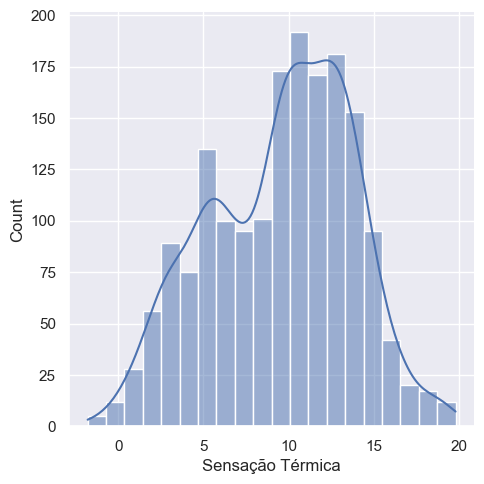

In [2438]:
sns.displot(teste_10, x='Sensação Térmica', kde=True)

Remover a coluna

In [2439]:
teste_missing_5 = teste_10.copy() 

In [2440]:
teste_missing_5.drop(['Sensação Térmica'], axis=1, inplace=True)
teste_missing_5.columns

Index(['Timestamp', 'Temperatura', 'Temperatura Mínima', 'Temperatura Máxima',
       'Pressão Atmosférica', 'Humidade', 'Velocidade Vento',
       'Precipitação Média', 'Nebulosidade', 'Estado do Tempo', 'Normal',
       'Horário Económico', 'Autoconsumo'],
      dtype='object')

Substituir os valores NaN pela mediana

In [2441]:
teste_missing_6 = teste_10.copy()

In [2442]:
def substitute_median(row):
    if pd.isna(row['Sensação Térmica']):
        return teste_missing_6['Sensação Térmica'].median()
    return row['Sensação Térmica']

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


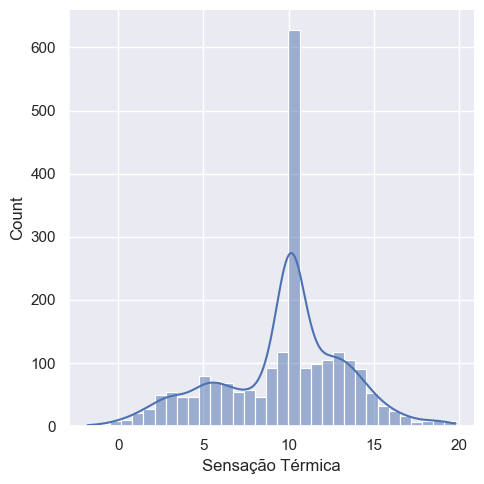

In [2443]:
teste_missing_6['Sensação Térmica'] = teste_missing_6.apply(substitute_median, axis=1)
sns.displot(teste_missing_6, x='Sensação Térmica', kde=True)

Interpolação

In [2444]:
teste_missing_7 = teste_10.copy()

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


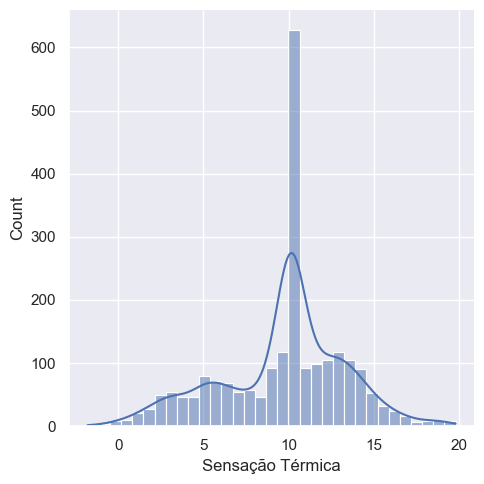

In [2445]:
teste_missing_7['Sensação Térmica'] = teste_missing_7['Sensação Térmica'].interpolate(method='linear')
sns.displot(teste_missing_7, x='Sensação Térmica', kde=True)

#### Temperatura Mínima

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


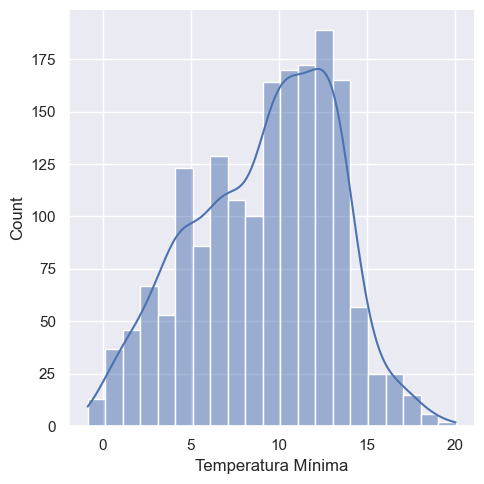

In [2446]:
sns.displot(teste_10, x='Temperatura Mínima', kde=True)

Remover a coluna

In [2447]:
teste_missing_8 = teste_10.copy() 

In [2448]:
teste_missing_8.drop(['Temperatura Mínima'], axis=1, inplace=True)
teste_missing_8.columns

Index(['Timestamp', 'Temperatura', 'Sensação Térmica', 'Temperatura Máxima',
       'Pressão Atmosférica', 'Humidade', 'Velocidade Vento',
       'Precipitação Média', 'Nebulosidade', 'Estado do Tempo', 'Normal',
       'Horário Económico', 'Autoconsumo'],
      dtype='object')

Substituir os valores NaN pela mediana

In [2449]:
teste_missing_9 = teste_10.copy()

In [2450]:
def substitute_median(row):
    if pd.isna(row['Temperatura Mínima']):
        return teste_missing_9['Temperatura Mínima'].median()
    return row['Temperatura Mínima']

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


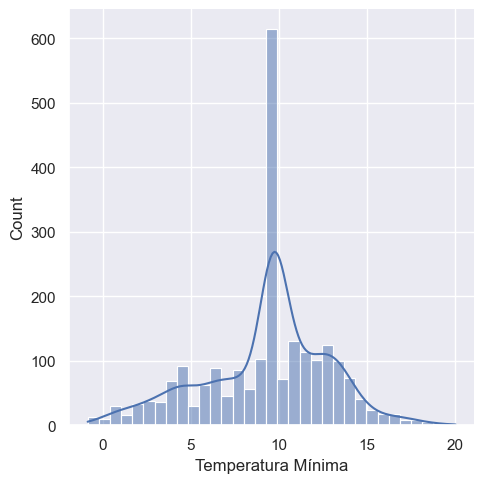

In [2451]:
teste_missing_9['Temperatura Mínima'] = teste_missing_9.apply(substitute_median, axis=1)
sns.displot(teste_missing_9, x='Temperatura Mínima', kde=True)

Interpolação

In [2452]:
teste_missing_10 = teste_10.copy()

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


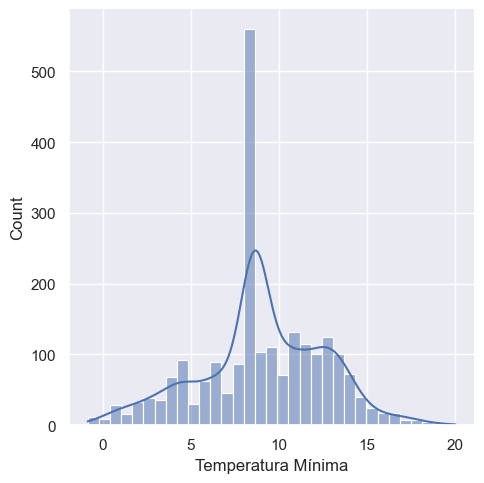

In [2453]:
teste_missing_10['Temperatura Mínima'] = teste_missing_10['Temperatura Mínima'].interpolate(method='linear')
sns.displot(teste_missing_10, x='Temperatura Mínima', kde=True)

#### Temperatura Máxima

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


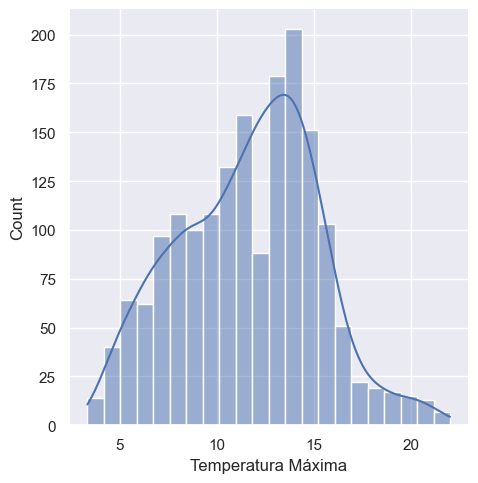

In [2454]:
sns.displot(teste_10, x='Temperatura Máxima', kde=True)

Remover a coluna

In [2455]:
teste_missing_11 = teste_10.copy() 

In [2456]:
teste_missing_11.drop(['Temperatura Máxima'], axis=1, inplace=True)
teste_missing_11.columns

Index(['Timestamp', 'Temperatura', 'Sensação Térmica', 'Temperatura Mínima',
       'Pressão Atmosférica', 'Humidade', 'Velocidade Vento',
       'Precipitação Média', 'Nebulosidade', 'Estado do Tempo', 'Normal',
       'Horário Económico', 'Autoconsumo'],
      dtype='object')

Substituir os valores NaN pela mediana

In [2457]:
teste_missing_12 = teste_10.copy()

In [2458]:
def substitute_median(row):
    if pd.isna(row['Temperatura Máxima']):
        return teste_missing_12['Temperatura Máxima'].median()
    return row['Temperatura Máxima']

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


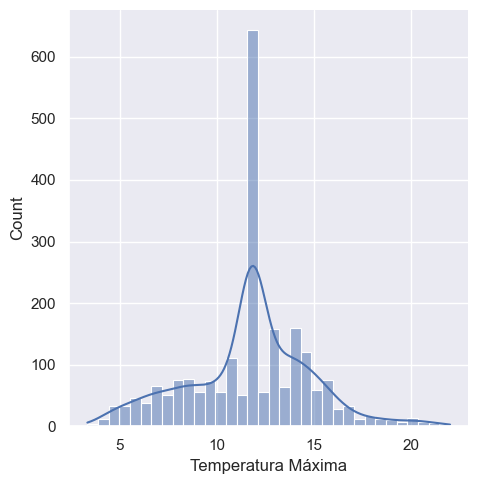

In [2459]:
teste_missing_12['Temperatura Máxima'] = teste_missing_12.apply(substitute_median, axis=1)
sns.displot(teste_missing_12, x='Temperatura Máxima', kde=True)

Interpolação

In [2460]:
teste_missing_13 = teste_10.copy()

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


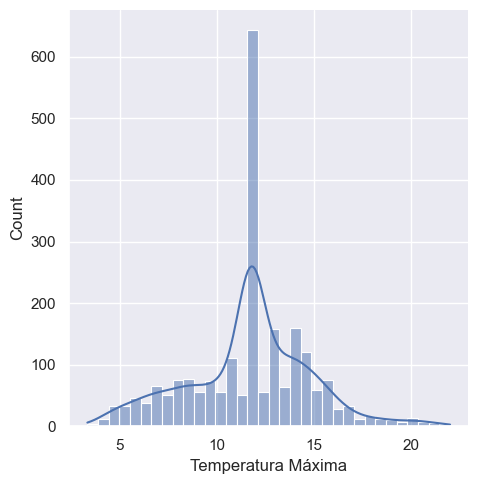

In [2461]:
teste_missing_13['Temperatura Máxima'] = teste_missing_13['Temperatura Máxima'].interpolate(method='linear')
sns.displot(teste_missing_13, x='Temperatura Máxima', kde=True)

#### Pressão Atmosférica

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


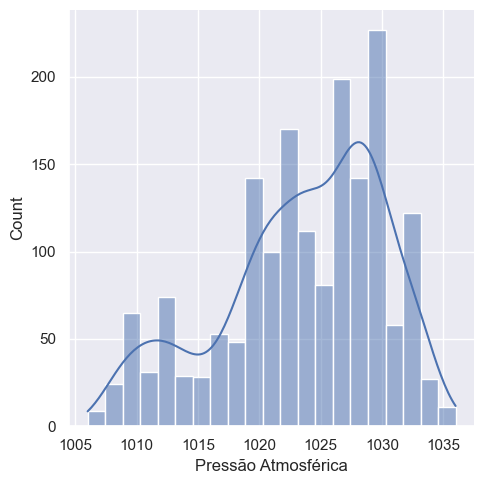

In [2462]:
sns.displot(teste_10, x='Pressão Atmosférica', kde=True)

Remover a coluna

In [2463]:
teste_missing_14 = teste_10.copy() 

In [2464]:
teste_missing_14.drop(['Pressão Atmosférica'], axis=1, inplace=True)
teste_missing_14.columns

Index(['Timestamp', 'Temperatura', 'Sensação Térmica', 'Temperatura Mínima',
       'Temperatura Máxima', 'Humidade', 'Velocidade Vento',
       'Precipitação Média', 'Nebulosidade', 'Estado do Tempo', 'Normal',
       'Horário Económico', 'Autoconsumo'],
      dtype='object')

Substituir os valores NaN pela mediana

In [2465]:
teste_missing_15 = teste_10.copy()

In [2466]:
def substitute_median(row):
    if pd.isna(row['Pressão Atmosférica']):
        return teste_missing_15['Pressão Atmosférica'].median()
    return row['Pressão Atmosférica']

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


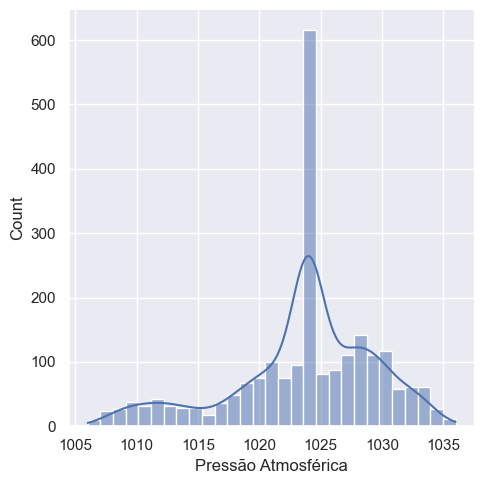

In [2467]:
teste_missing_15['Pressão Atmosférica'] = teste_missing_15.apply(substitute_median, axis=1)
sns.displot(teste_missing_15, x='Pressão Atmosférica', kde=True)

Interpolação

In [2468]:
teste_missing_16 = teste_10.copy()

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


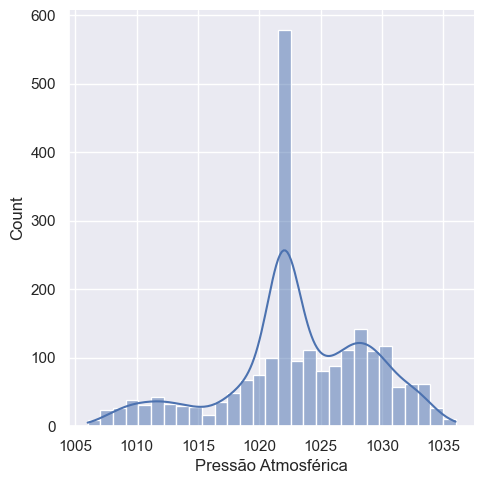

In [2469]:
teste_missing_16['Pressão Atmosférica'] = teste_missing_16['Pressão Atmosférica'].interpolate(method='linear')
sns.displot(teste_missing_16, x='Pressão Atmosférica', kde=True)

#### Humidade

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


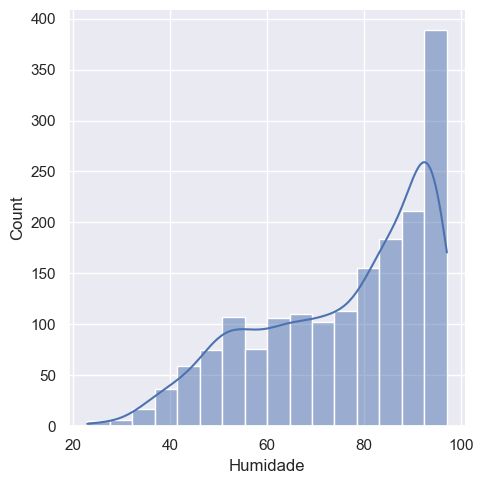

In [2470]:
sns.displot(teste_10, x='Humidade', kde=True)

Remover a coluna

In [2471]:
teste_missing_17 = teste_10.copy() 

In [2472]:
teste_missing_17.drop(['Humidade'], axis=1, inplace=True)
teste_missing_17.columns

Index(['Timestamp', 'Temperatura', 'Sensação Térmica', 'Temperatura Mínima',
       'Temperatura Máxima', 'Pressão Atmosférica', 'Velocidade Vento',
       'Precipitação Média', 'Nebulosidade', 'Estado do Tempo', 'Normal',
       'Horário Económico', 'Autoconsumo'],
      dtype='object')

Substituir os valores NaN pela mediana

In [2473]:
teste_missing_18 = teste_10.copy()

In [2474]:
def substitute_median(row):
    if pd.isna(row['Humidade']):
        return teste_missing_18['Humidade'].median()
    return row['Humidade']

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


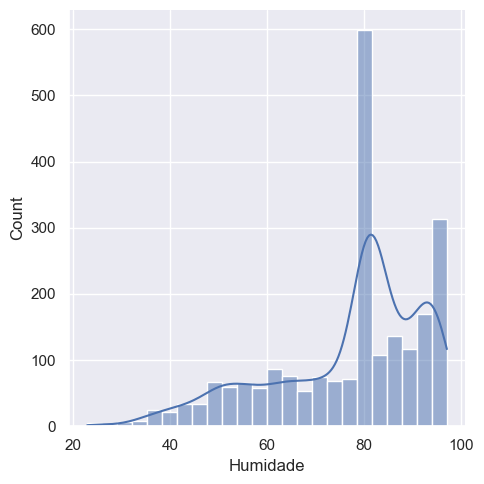

In [2475]:
teste_missing_18['Humidade'] = teste_missing_18.apply(substitute_median, axis=1)
sns.displot(teste_missing_18, x='Humidade', kde=True)

Interpolação

In [2476]:
teste_missing_19 = teste_10.copy()

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


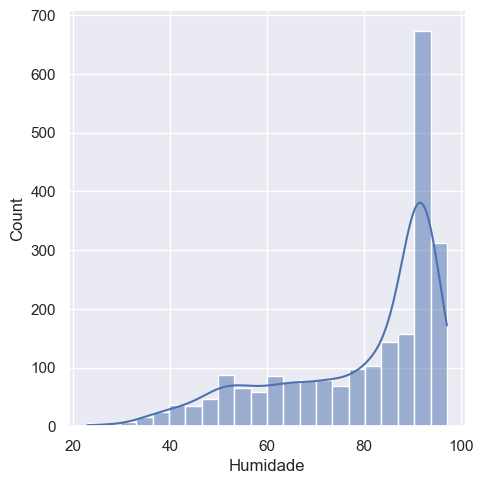

In [2477]:
teste_missing_19['Humidade'] = teste_missing_19['Humidade'].interpolate(method='linear')
sns.displot(teste_missing_19, x='Humidade', kde=True)

#### Velocidade Vento

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


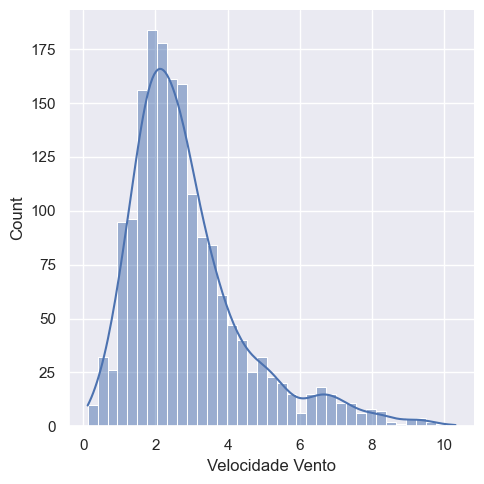

In [2478]:
sns.displot(teste_10, x='Velocidade Vento', kde=True)

Remover a coluna

In [2479]:
teste_missing_20 = teste_10.copy() 

In [2480]:
teste_missing_20.drop(['Velocidade Vento'], axis=1, inplace=True)
teste_missing_20.columns

Index(['Timestamp', 'Temperatura', 'Sensação Térmica', 'Temperatura Mínima',
       'Temperatura Máxima', 'Pressão Atmosférica', 'Humidade',
       'Precipitação Média', 'Nebulosidade', 'Estado do Tempo', 'Normal',
       'Horário Económico', 'Autoconsumo'],
      dtype='object')

Substituir os valores NaN pela mediana

In [2481]:
teste_missing_21 = teste_10.copy()

In [2482]:
def substitute_median(row):
    if pd.isna(row['Velocidade Vento']):
        return teste_missing_21['Velocidade Vento'].median()
    return row['Velocidade Vento']

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


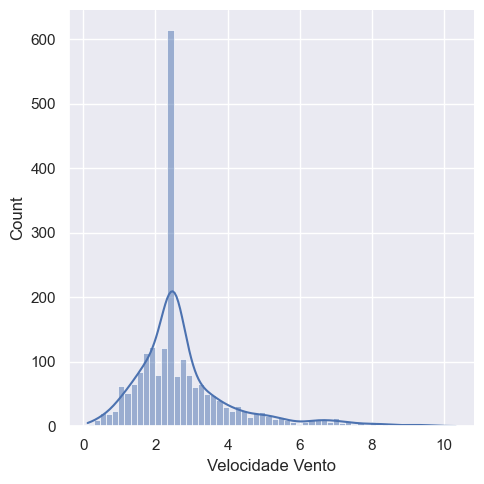

In [2483]:
teste_missing_21['Velocidade Vento'] = teste_missing_21.apply(substitute_median, axis=1)
sns.displot(teste_missing_21, x='Velocidade Vento', kde=True)

Interpolação

In [2484]:
teste_missing_22 = teste_10.copy()

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


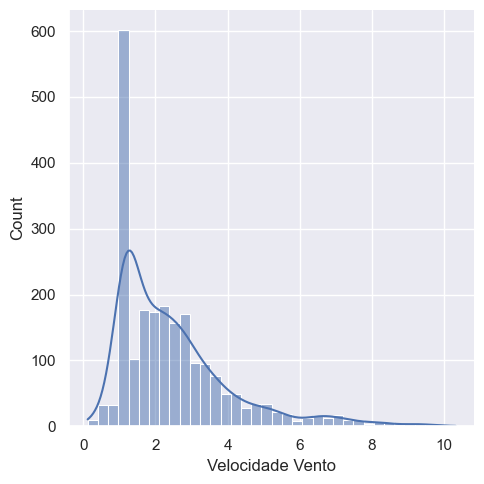

In [2485]:
teste_missing_22['Velocidade Vento'] = teste_missing_22['Velocidade Vento'].interpolate(method='linear')
sns.displot(teste_missing_22, x='Velocidade Vento', kde=True)

#### Nebulosidade

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


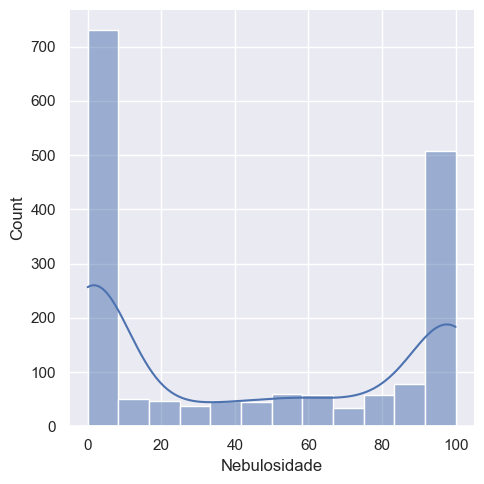

In [2486]:
sns.displot(teste_10, x='Nebulosidade', kde=True)

Remover a coluna

In [2487]:
teste_missing_23 = teste_10.copy() 

In [2488]:
teste_missing_23.drop(['Nebulosidade'], axis=1, inplace=True)
teste_missing_23.columns

Index(['Timestamp', 'Temperatura', 'Sensação Térmica', 'Temperatura Mínima',
       'Temperatura Máxima', 'Pressão Atmosférica', 'Humidade',
       'Velocidade Vento', 'Precipitação Média', 'Estado do Tempo', 'Normal',
       'Horário Económico', 'Autoconsumo'],
      dtype='object')

Substituir os valores NaN pela mediana

In [2489]:
teste_missing_24 = teste_10.copy()

In [2490]:
def substitute_median(row):
    if pd.isna(row['Nebulosidade']):
        return teste_missing_24['Nebulosidade'].median()
    return row['Nebulosidade']

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


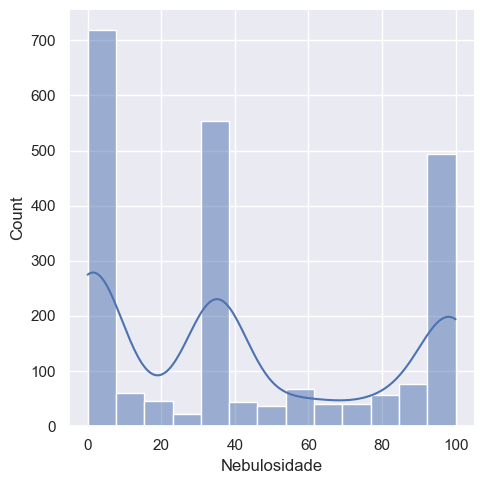

In [2491]:
teste_missing_24['Nebulosidade'] = teste_missing_24.apply(substitute_median, axis=1)
sns.displot(teste_missing_24, x='Nebulosidade', kde=True)

Interpolação

In [2492]:
teste_missing_25 = teste_10.copy()

c:\Users\Marta\miniconda3\envs\envPython\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


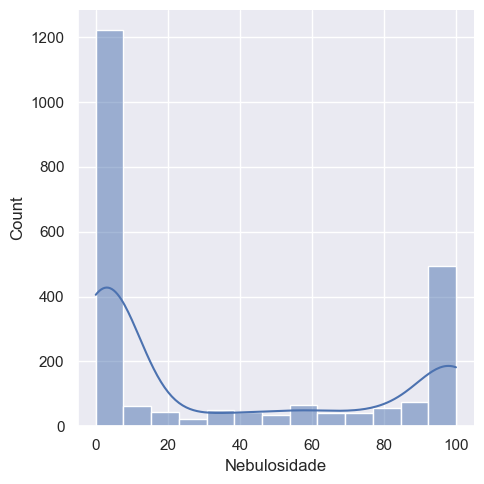

In [2493]:
teste_missing_25['Nebulosidade'] = teste_missing_25['Nebulosidade'].interpolate(method='linear')
sns.displot(teste_missing_25, x='Nebulosidade', kde=True)

### Exploratory Data Analysis 

In [2494]:
#fig = plt.figure(figsize = (10,10))
#incidents_corr = e_m.corr(method = 'pearson')
#sns.heatmap(incidents_corr, linecolor = 'black', linewidths = 0.5)

In [2495]:
#-sns.pairplot(e_m)

In [2496]:
#sns.set_palette("GnBu_d")
#sns.set_style('whitegrid')
#sns.jointplot(x='magnitude_of_delay', y='delay_in_seconds', data = e_m)

In [2497]:
#sns.joinplot(x='',y='',data=e_m)

In [2498]:
#sns.Implot(x='',y='',data=e_m)

## Modelos

In [2499]:
x = e_m_10.drop(['Injeção na Rede'], axis=1)   # input features - tudo exceto o target
y = e_m_10['Injeção na Rede']                  # target feature - Injeção na Rede

In [2500]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

In [2501]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2411, random_state=2023)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2656 entries, 4626 to 3492
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            2656 non-null   int64  
 1   Temperatura          2656 non-null   float64
 2   Sensação Térmica     2656 non-null   float64
 3   Temperatura Mínima   2656 non-null   float64
 4   Temperatura Máxima   2656 non-null   float64
 5   Pressão Atmosférica  2656 non-null   int64  
 6   Humidade             2656 non-null   int64  
 7   Velocidade Vento     2656 non-null   float64
 8   Precipitação Média   555 non-null    float64
 9   Nebulosidade         2656 non-null   int64  
 10  Estado do Tempo      2656 non-null   int64  
 11  Normal               2656 non-null   float64
 12  Horário Económico    2656 non-null   float64
 13  Autoconsumo          2656 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 311.2 KB


### Decision Tree

In [2502]:
from sklearn.tree import DecisionTreeClassifier

In [2503]:
#criação de uma arvore de decião 73%
print("**DecisionTreeClassifier**")
clf_Tree = DecisionTreeClassifier(random_state=2023)
clf_Tree.fit(x,y)

print("Test Data...")
predictions_Tree = clf_Tree.predict(teste_10)
print(predictions_Tree)

#k cross val
print("Training Data...")
scores = cross_val_score(clf_Tree,x,y,cv = 10)
print("Cross Validation Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

**DecisionTreeClassifier**
Test Data...
[0 0 0 ... 0 0 0]
Training Data...
Cross Validation Accuracy: 0.7074 (+/- 0.2253)
